※ 図に関しては，特段注釈が入れられていない場合，書籍「最短コースでわかる PyTorch ＆深層学習プログラミング」から参照しています．

---

# NumPy
NumPyは、プログラミング言語Pythonにおいて数値計算を効率的に行うための拡張モジュールです．
特に
- 多次元配列(ベクトル，行列など)を効率的に扱える

という理由で多くの場面で使われるパッケージです．

---

## ベクトル
早速，NumPyでベクトルを定義してみましょう．  
NumPyの配列は，
- `numpy.array`

で作成することができます．  

※ 以降，変数の型が`numpy.ndarray`のものを「NumPy変数」と呼ぶこととします．

In [22]:
import numpy as np # numpyをインポート（一般にnpと略される）．
vector = np.array([1, 2, 3, 4, 5]) # 長さ5のベクトル
print(vector) # ベクトルを表示
print(type(vector)) # 変数の型を表示

[1 2 3 4 5]
<class 'numpy.ndarray'>


<br>

ベクトル同士を足したい場合は，下記コードのように
- NumPy変数として定義したベクトル同士を`+`で

足すだけでOKです．  

---
この時，お互いのベクトルの長さが異なるとエラーが出るので気をつけましょう．  
（気になる人は，長さが違うベクトル同士を足し合わせてみても良いと思います）

---

In [30]:
import numpy as np 
vector1 = np.array([1, 2, 3, 4, 5]) 
vector2 = np.array([4, 4, 4, 7, 7])

sum_vector = vector1 + vector2 # ベクトル同士の足し算
print(sum_vector) # 足した後のベクトルを表示

[ 5  6  7 11 12]


<br>

ベクトルの任意の要素を取り出したい時は，下記のように
- インデックスを指定

しましょう．

---
pythonでは，インデックスは 

「1番目，2番目，3番目，・・・」ではなく  
「0番目，1番目，2番目，3番目，・・・」と
- 「0」から開始する

ことに注意しましょう

---

In [24]:
import numpy as np 
vector = np.array([80, 23, 55, 9])
num1 = vector[0] # vectorの0番目の要素を抽出
num2 = vector[1] # vectorの1番目の要素を抽出
print(num1)
print(num2)

80
23


<br>

ベクトルの長さを調べたいときは，
- `len`

を使用しましょう．


In [25]:
import numpy as np 
vector = np.array([80, 23, 55, 9])
vector_length = len(vector) # ベクトルの長さを取得
print(vector_length)

4


<br>

ベクトルを連結させたいときは
- `append`

を使用しましょう  

---
※ 注意点：下記の場合，`vector1`の値が書き変わるわけではない（連結した結果を`vector2`に代入しているだけ）ので注意
```
vector1 = np.array([80, 23, 55, 9])
vector2 = np.append(vector1, 79)
```

---

In [28]:
import numpy as np
vector1 = np.array([80, 23, 55, 9])
vector2 = np.append(vector1, 79) # vector1に任意のスカラーを連結
print(vector2)

vector3 = np.array([48, 32, 43, 12])
vector4 = np.append(vector1, vector3) # vector1の後ろにvector3を連結
print(vector4)

print(vector1) # vector1の値は書き変わっていない

[80 23 55  9 79]
[80 23 55  9 48 32 43 12]
[80 23 55  9]


ここまでで，NumPyが割と直感的に使えることがわかったと思います．  
次は，行列について扱います．

---

## 行列
基本的な操作は，ベクトルの時と同じです．  

### 行列の定義
ベクトルと同じように
- `numpy.array`

で定義しましょう．（3次元以上でも同じです）

In [35]:
import numpy as np

array = np.array([[1, 2, 3], 
                  [4, 5, 6]])
print(array)


[[1 2 3]
 [4 5 6]]


<br>

行列の要素を抽出したい場合は，下記コードのように
- 数学の行列と同じような扱い方

ができます

In [37]:
import numpy as np

array = np.array([[1, 2, 3], 
                  [4, 5, 6]])

num = array[0][2] # 0行2列目の要素を抽出
print(num) 

3


<br>

機械学習の場合，
- 行列を画像として扱う

ことが多いと思うので，ここからは画像を例にして進めていきます．

### ヒートマップ
小さい行列を画像として見立てて，ヒートマップを確認してみましょう．  

下記コードを実行すると
- 画素値が高い箇所は白に近く，画素値が低い箇所は黒に近くなっている

ことが分かると思います．（画像の各画素の画素値は「0〜255の整数値」なので，下記コードでもそのように設定しています．）

---
**重要**  
---
ここで注意して欲しいのが，画像の画素を指定したいときに，
- `array[x][y]`

の順番で指定したくなりますが，これだと欲しい画素値が取得できません．  

なぜなら，配列は`array[行][列]`の順番になるので，これをx,yに置き換えると
- `array[y][x]`

となるためです．

例えば，下記コードで生成されるヒートマップの右上の画素の画素値を取得したい場合は
- `array[0][2]`

とする必要があります．

<br>

もう一つの注意点として，原点は画像の左上になるため，  
- y軸は，上方向が-, 下方向が+

となり，一般的な数学で使われる座標系に対して，y軸が逆方向を向いていることに注意してください．

---


255


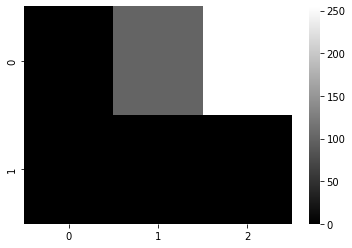

In [14]:
%matplotlib inline
import numpy as np

# 描画に必要なモジュールをインポート
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

array = np.array([[0, 100, 255], 
                  [0,   0,   0]])
sns.heatmap(array, cmap="gray", vmin=0, vmax=255) # 配列をヒートマップとして表示

print(array[0][2]) # 右上の画素を取得(array[y][x]の順番)

ここから，本格的な画像を扱う場合「OpenCV」と呼ばれるライブラリの知識が必要になってきますが，機械学習に関する説明を優先するため，ここでは割愛します．

<br>

以上で，NumPyの基本的な使い方の説明は終わりです．  
3次元以上に関しても，同じような方法で扱うことができます．

---

# Tensor
すごく簡単に言えばTensorは「機械学習用のNumPy」のようなものになります．  

特に，NumPyと最も異なる点として，Tensorは
- GPUを使用して演算

をすることが可能です

---

## 配列
Tensorでの配列の生成方法はNumPyと非常に似ていますが，関数名は異なり
- `torch.Tensor`

により配列を生成します．  
※ 以降，変数の型が`torch.Tensor`のものを「Tensor変数」と呼ぶこととします．

In [23]:
import torch 
vector = torch.Tensor([1, 2]) # 1次元配列（=ベクトル）の生成
array = torch.Tensor([[1, 2],
                      [3, 4]]) # 2次元配列（=行列）の生成
print(vector)
print(array)

print(type(vector))

tensor([1., 2.])
tensor([[1., 2.],
        [3., 4.]])
<class 'torch.Tensor'>


---

## TensorとNumpyの相互変換
冒頭でも記述したとおり，NumPyとTensorには互換性があります．ここでは，Numpy変数 → Tensor変数，およびTensor変数 → NumPy変数への変換方法を紹介します（いくつか方法がありますが，その中の一つを紹介します）．  
例えば，「NumPy変数でデータの前処理」→「Tensor変数に変換してGPUに送る」といった時などに使用します．

最初に，Numpy変数 → Tensor変数への変換は
- `torch.tensor(NumPy変数)`

になります．

<br>

Tensor変数に変換するだけだったらこれだけでもOKなのですが，
- `torch.tensor(NumPy変数).float()`

と後ろに`float()`をつけることで各要素をfloat32に変換します．これは，以降で説明する機械学習のライブラリを使うときに
- Tensorの各要素の型がfloat32でないとエラーが発生

する時があるため，基本的にNumpy変数 → Tensor変数に変換するときは，後ろに`float()`をつけましょう（一部float32以外の型が求められる時もあります）．

In [36]:
import numpy as np
import torch

np_array = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
np_array_to_tensor = torch.tensor(np_array).float()
print(type(np_array))
print(type(np_array_to_tensor)) # torch.Tensor に変換されていることが分かる

print(np_array.dtype)
print(np_array_to_tensor.dtype) # float32に変換されていることが分かる

<class 'numpy.ndarray'>
<class 'torch.Tensor'>
float64
torch.float32


<br>

次に，Tensor変数 → NumPy変数への変換は
- `Tensor変数.numpy()`

になります．

In [35]:
import torch 
tensor_array = torch.Tensor([1.0, 2.0]) 
tensor_array_to_numpy = tensor_array.numpy()

print(type(tensor_array))
print(type(tensor_array_to_numpy)) # numpu.ndarrayに変換されていることが分かる
print(tensor_array_to_numpy)


<class 'torch.Tensor'>
<class 'numpy.ndarray'>
[1. 2.]


ここまでで，いったんTensorの話を終了します．  

以降は，機械学習のライブラリであるPyTorchの話に移ります．しかし，今までのコードを見ていただければ分かるとおり，TensorもPyTorchの機能の一つ（`import torch`でPyTorchをインポートしています）なので，以降はPyTorchを使った機械学習を説明していく中で，その都度Tensorの機能についても説明していきます．

---

# PyTorchを使用した機械学習
機械学習で使用されるライブラリの中で有名なものの中にPyTorchがあります．  
以降では，PyTorchを使用した機械学習の方法を説明していきます．

勾配効果法による学習の流れは，下記の通りです．

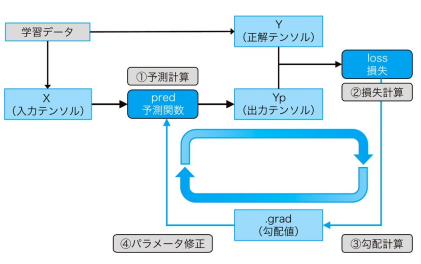



---


## ①予測計算
機械学習モデルは上図の「予測関数」predと書かれている部分に当たります．   
ここで，**入力テンソルX**を入力とし，予測結果は**出力テンソルYp**に出力されるものとします．  

この例では，予測関数は下記の様な一次関数となります．    
$$  \mathrm{Y_p = W*X+B} $$  
このように，予測関数によりYpを求めることを「①予測計算」と呼びます．  
予測関数は係数Wと定数Bをパラメータに持っているので，このパラメータが変わると，「予測計算」の結果も変わります（Wは重み，Bはバイアスと呼ばれます）．



---

## ②損失計算
「教師あり学習」において学習データは，入力と正解値の両方を含むので，正解値の例を分離して**正解テンソルY**とします．  

予測結果のYpと正解のYは異なっているのが普通なので，その違いの程度を評価する目的で，この2つのテンソルを入力とする**損失Loss**を定義します．  

機械学習の目標は，損失が小さくなるようなパラメータB,Wを求めることですが，これは「②損失計算」に当たります．  

損失関数は問題設定によって適したものを採用します．



---

## ③勾配計算
予測関数を構成するパラメータを少しずつ変えながらその時の損失の変化の度合い（勾配）を調べます．



---

## ④パラメータ修正
勾配値に小さな定数（**学習率**）lrをかけ，その値だけWとBを同時にずらします．これを**パラメータ修正**といいます．

---

このように①〜④を繰り返すことで，学習が進んでいきます．

## 勾配降下法の実装

さて，それでは勾配降下法の実装を行っていきましょう．  
ここでは，機械学習の中で最も単純な問題である線形回帰について解いていきましょう．

問題設定は以下のようにします．

---

5人の人間が下記のような（身長，体重）の場合を考える  
(166, 58.7), (176, 75.7), (171, 62.1), (173, 70.4), (169, 60.1)  

身長をx軸，体重を縦軸とすると下記のようなグラフになる
  
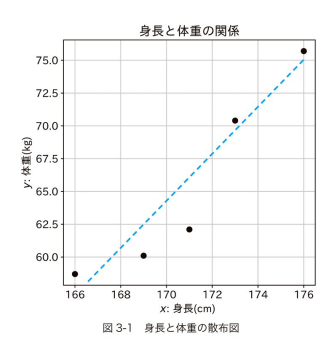 

---

上記のグラフをみると，身長の体重の間には何かしらの関係があるような気がします．
  
ここで，線形回帰の目的を今回の問題に当てはめると
- 5つの点に最も合った1次関数を求める（上図の点線にあたる）

ということになります．

### ⓪データ前処理
最初に学習に必要なデータを用意しましょう．  
上記で示した5組（身長，体重）のデータを学習データにします

In [2]:
import numpy as np

# 学習データの用意
sampleData = np.array([
    [166, 58.7], 
    [176.0, 75.7],
    [171.0, 62.1],
    [173.0, 70.4],
    [169.0, 60.1]
])

# 学習データを入力データx，正解データyに分割
x = sampleData[:, 0]
y = sampleData[:, 1]


<br>

次にデータの変換を行います．  
一般に，勾配降下法では
- 対象となる数値が1以内に収まるような比較的小さな値の方が望ましい

ことが分かっています．今回の場合，身長も体重も大きな数値なので，それぞれの平均値を引きことで勾配降下法がやりやすい条件に変更することにします．

In [3]:
import torch

X = x - x.mean()
Y = y - y.mean()

# NumPy変数 → Tensor変数に変換
X =  torch.tensor(X).float()
Y =  torch.tensor(Y).float()

### ①予測計算
先ほど示したように，予測関数は下記の様な一次関数となるため，重みWとバイアスBもTensor変数として定義し，予測値Ypを求めます．    
$$  \mathrm{Y_p = W*X+B} $$  

In [5]:
# 今回は，W,Bそれぞれの初期値を1.0に設定します．
# また，W,Bは勾配降下法の対象となるため「requires_grad属性をTrue」にして微分可能にします．
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

# 予測関数
def pred(X):
    return W*X +B

Yp = pred(X)

print(Yp)

tensor([-4.,  6.,  1.,  3., -1.], grad_fn=<AddBackward0>)


### ②損失計算
次に，損失を計算します．  
今回は，MSE（平均２乗誤差）と呼ばれる誤差関数を使用します．

In [6]:
def mse(Yp, Y):
    loss = ((Yp - Y)**2).mean()
    return loss

loss = mse(Yp, Y) # 「正解値Y」が「予測値Yp」に対してどの程度，誤差があるか（誤差が大きいほどlossも大きくなる）
print(loss)

tensor(13.3520, grad_fn=<MeanBackward0>)


### ③勾配計算
損失関数の準備まで終われば，勾配計算はbackward関数を呼び出すだけでOKです．

In [7]:
loss.backward()
print(W.grad)
print(B.grad)

tensor(-19.0400)
tensor(2.0000)


### ④パラメータ修正
勾配計算が完了したら
- その値に一定の学習率lrをかけた結果を，元のパラメータから引く

のが勾配降下法の基本的な考え方です．  
<br>

この際，単純にWとBを更新しようとするとエラーが起こります．  
これは，「勾配計算を行っている最中の変数（W,B）は他に影響が及んでしまうため，勝手に値を修正できない」というような仕様になっているためです．  

そこで，
- `with torch.no_grad()`というコンテキストを設定する

ことで，その内部では一時的に計算グラフの生成機能が停止して，変数の修正が可能となります．

In [9]:
lr = 0.001 # 学習率は一般に0.01や0.001といった値にすることが多いです
with torch.no_grad():
    W -= lr*W.grad
    B -= lr*B.grad

    W.grad.zero_() # 勾配値リセット
    B.grad.zero_() # 勾配値リセット

# WとBの初期値は1.0なので，Wは増加方向，Bは減少方向に少し変化していることが分かると思います
print(W)
print(B)

tensor(1.0190, requires_grad=True)
tensor(0.9980, requires_grad=True)


### 繰り返し計算
これまでの①〜④の流れを繰り返し計算するように設定します．  
変更点として
- 学習曲線(学習の過程)を記録するために「損失の記録」（今回の場合，10回に1回）を行っています
- 最適化関数を利用しています

<br>

---
**最適化関数について**  

先ほど，「④パラメータ修正」では，WとBの変更を直接コーディングしていましたが，PyTorchでは一般に「最適化関数」と呼ばれる関数を経由して変更します．最適化関数を使用する場合は，パラメータ修正時に`with torch.no_grad()`のコンテキストを使用する必要はありません．  
<br>

以下コードの追加部分を見ると
- SGDというクラスのインスタンスを生成し，optimizerという変数に保存しています．これが，最適化関数に該当します

また，最適化関数を適用することで学習の速度が速くなることが分かっているので，そういった意味でも最適化関数を利用した方が良いです．

---

In [10]:
# ここから初期化 -----
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

num_epochs = 500 # 繰り返し回数

lr = 0.001

# ----------追加-----------------
import torch.optim as optim
optimizer = optim.SGD([W, B], lr=lr)
# -------追加ここまで-------------

history = np.zeros((0, 2)) # 記録用配列初期化
# ここまで初期化 -------

# ここから繰り返し部分 ------

for epoch in range(num_epochs):
    Yp = pred(X) # 予測計算
    loss = mse(Yp, Y) # 損失計算

    # 勾配計算
    loss.backward()

    # --------パラメータ更新　変更後(最適化関数使用)--------------
    # パラメータ修正
    optimizer.step()

    # 勾配値初期化
    optimizer.zero_grad()
    #---------変更後ここまで------------------------------------
    
    # ----------パラメータ更新　変更前(W，Bを直接修正)------------------
    """
    with torch.no_grad():
      # パラメータ修正
      W -= lr * W.grad
      B -= lr * B.grad

      # 勾配値の初期化
      W.grad.zero_() 
      B.grad.zero_()
    """
    #----------変更前ここまで---------------------------------------
    
    # 損失の記録
    if (epoch %10 == 0):
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f"epoch = {epoch} loss = {loss: .4f}") 

epoch = 0 loss =  13.3520
epoch = 10 loss =  10.3855
epoch = 20 loss =  8.5173
epoch = 30 loss =  7.3364
epoch = 40 loss =  6.5858
epoch = 50 loss =  6.1047
epoch = 60 loss =  5.7927
epoch = 70 loss =  5.5868
epoch = 80 loss =  5.4476
epoch = 90 loss =  5.3507
epoch = 100 loss =  5.2805
epoch = 110 loss =  5.2275
epoch = 120 loss =  5.1855
epoch = 130 loss =  5.1507
epoch = 140 loss =  5.1208
epoch = 150 loss =  5.0943
epoch = 160 loss =  5.0703
epoch = 170 loss =  5.0480
epoch = 180 loss =  5.0271
epoch = 190 loss =  5.0074
epoch = 200 loss =  4.9887
epoch = 210 loss =  4.9708
epoch = 220 loss =  4.9537
epoch = 230 loss =  4.9373
epoch = 240 loss =  4.9217
epoch = 250 loss =  4.9066
epoch = 260 loss =  4.8922
epoch = 270 loss =  4.8783
epoch = 280 loss =  4.8650
epoch = 290 loss =  4.8522
epoch = 300 loss =  4.8399
epoch = 310 loss =  4.8281
epoch = 320 loss =  4.8167
epoch = 330 loss =  4.8058
epoch = 340 loss =  4.7953
epoch = 350 loss =  4.7853
epoch = 360 loss =  4.7756
epoch = 37

### 結果の評価
学習後の結果を，様々な角度から評価してみましょう．  
最初に，損失の減り方をグラフで確認して見ると，損失が徐々に減少して学習していることが確認できます．

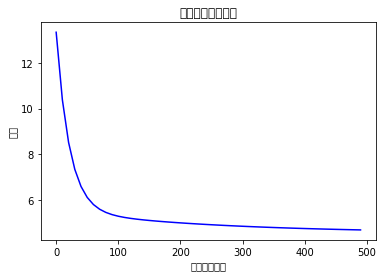

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history[:, 0], history[:, 1], "b")
plt.xlabel("繰り返し回数")
plt.ylabel("損失")
plt.title("学習曲線（損失）")
plt.show()

<br>

次に，学習後のWとBの値から直線の式を求め，散布図に重ね書きしてみましょう．上手くWとBが求められていることが分かると思います．

tensor([-5.,  5.])
tensor([-8.7359,  9.4709])


/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


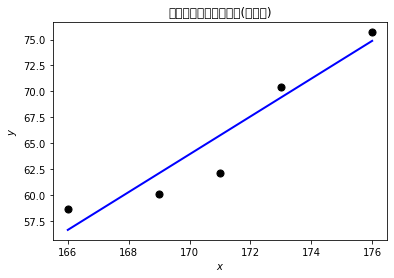

In [15]:
# --- グラフを見やすくするための前処理 -------
# xの範囲を求める(Xrange)
X_max = X.max()
X_min = X.min()
X_range = np.array((X_min, X_max))
X_range = torch.from_numpy(X_range).float()
print(X_range)

# 対応するyの予測値を求める
Y_range = pred(X_range)
print(Y_range.data)
# --- 前処理ここまで ----------------------


# 学習前に，平均値を引き算しているので，元の身長にもどす
x_range = X_range + x.mean()
yp_range = Y_range + y.mean()

# グラフ描画
plt.scatter(x,  y,  c='k',  s=50)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(x_range, yp_range.data, lw=2, c='b')
plt.title('身長と体重の相関直線(加工前)')
plt.show()

## 補足：勾配計算
③の勾配計算は，勾配降下法の肝となる部分なので，ここで詳しく説明したいと思います．   
勾配計算には微分の処理が必要になりますが，PyTorchでは
- 自動微分機能

が備わっているため，簡単に勾配計算が可能です．  

ここでは，2次関数 $y=2x^2+2$ を例に計算を行ってみましょう．

In [16]:
import numpy as np
import torch

x_np = np.arange(-2, 2.1, 0.25) # 適当な範囲のxを用意します

# numpy変数 → Tensor変数に変換します．この時，requires_grad = Trueで勾配計算をするように指定します．
# ちなみに下記のように，dtype=torch.float32と指定する方法でもfloat32に変換することが可能です．
x = torch.tensor(x_np, requires_grad=True, dtype=torch.float32) 

y = 2 * x**2 + 2 # 入力されたxに対して計算を行います．
print(y)

tensor([10.0000,  8.1250,  6.5000,  5.1250,  4.0000,  3.1250,  2.5000,  2.1250,
         2.0000,  2.1250,  2.5000,  3.1250,  4.0000,  5.1250,  6.5000,  8.1250,
        10.0000], grad_fn=<AddBackward0>)


<br>

`出力y`が得られたので，早速勾配を計算したいところですが，
- PyTorchの勾配計算では，計算対象となる関数はスカラーである必要

があります．そこで，
- yの値をsum関数で全て足し合し，その結果をTensor変数zに代入

します．

In [17]:
z = y.sum()

<br>

ここで，勾配計算する前に，計算グラフを見てみましょう．  
計算グラフとはPyTorchの機能の一つで
- データとそれに対する演算の順番

を可視化できるものです．  

計算グラフは，
- `make_dot`

を使用することで，確認できます．この関数自体は勾配計算には関係ありませんが，処理の流れを確認する時に便利な機能なので知っておいて損はないでしょう．

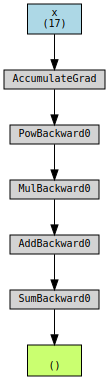

In [18]:
from torchviz import make_dot
g = make_dot(z, params={'x': x})
display(g)

<br>

勾配計算を行います．  
勾配の計算は，以下のコードのように1行で終了します．

In [19]:
z.backward() # 勾配計算

<br>

勾配の計算が終わると，勾配値がgrad属性に保存されるので確認してみましょう．

In [20]:
print(x.grad)

tensor([-8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
         6.,  7.,  8.])


<br>

結果を可視化してみましょう．  
結果を見てみると，ygradがyの接線になっていますが，勾配は「傾き具合」を示すものなので正しく計算できています． 

---
yの勾配は `x.grad.data` に格納されていることに注意してください

---

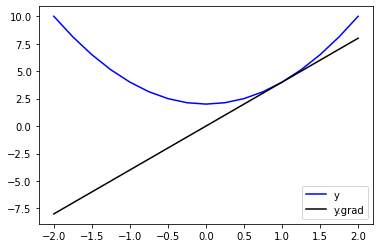

In [21]:
import matplotlib.pyplot as plt
plt.plot(x.data, y.data, c="b", label="y") # 関数の描画
plt.plot(x.data, x.grad.data, c="k", label="y.grad") # 勾配の描画
plt.legend()
plt.show()

<br>

実際に学習を行う場合は，この勾配を繰り返す必要があるわけですが，
- 繰り返すごとに，勾配値の初期化をする必要がある

ことに注意してください．  

試しに，下記のコードで初期化をせずに勾配を2回行ってみると，勾配の値が2倍されていることが分かると思います．これは
- `x.gard`には最新の値ではなく，今までの勾配計算の結果が加算された値

が入っているためです．

In [22]:
y = 2 * x**2 + 2
z = y.sum()
z.backward()

print(x.grad)

tensor([-16., -14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,
          8.,  10.,  12.,  14.,  16.])


<br>

上記の結果から，勾配値の初期化を毎回行う必要があることが分かったと思うので，実際に勾配値の初期化を実行してみましょう．

In [23]:
x.grad.zero_() # 勾配値の初期化
print(x.grad) # 勾配値が初期化されていることを確認できます

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


---

# 線形回帰
ここからは，線形回帰の問題について，もっと詳しく説明していきます．  
<br>

まず，回帰には
- 単回帰
- 重回帰

の2種類が存在し，これらを合わせて
- 線形回帰

と呼びます．



---

## 問題設定
今回は，「ボストン・データセット」と呼ばれるデータセットを使用します．

In [2]:
# 学習用データ準備

from sklearn.datasets import load_boston

# データ読み込み
boston = load_boston()

# 入力データと正解データ取得
x_org, yt = boston.data, boston.target

# 各項目名リスト取得
feature_names = boston.feature_names

print("元データ", x_org.shape, yt.shape)
print("項目名", feature_names)

# データ絞り込み（項目RM（平均部屋数）のみを抽出する）
x = x_org[:, feature_names == "RM"]
print("絞り込み後", x.shape)
print(x[:5, :])

print("正解データ")
print(yt[:5])

元データ (506, 13) (506,)
項目名 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
絞り込み後 (506, 1)
[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]
正解データ
[24.  21.6 34.7 33.4 36.2]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.


---

## 単回帰
単回帰とは
- 1入力，1出力（ここで，入力は「説明変数」，出力は「目的変数」と呼ばれます）

の回帰問題のことであり，正確には「線形単回帰」と呼びます．  
<br>

今回は，説明変数にあたる入力を「平均部屋数」，目的変数にあたる出力を「不動産価格」として，これらの関係性を調べます．

<br>

最初に，予測関数を定義します．  
前章では，予測関数を以下のように定義しました．
```
# 予測関数
def pred(X):
    return W*X +B
```

今回は，クラスを使用して予測関数を定義します．ここで，予測関数は一般に
- モデル

と呼ばれます．

ここで，下記コードの重要な部分を説明すると
- クラスの親クラスに`torch.nn.Module`を指定します（親クラスに`torch.nn.Module`を指定することで，以降でも説明する様々な便利な機能を使用することができます）．
- クラスの内部には，`forward関数`が定義されており，この関数内で予測処理を実施します．

In [3]:
import torch
class Net(torch.nn.Module):
    def __init__(self, n_input, n_output):
        # 親クラスnn.Moduleの初期化呼び出し
        super().__init__()

        # 出力層の定義
        self.l1 = torch.nn.Linear(n_input, n_output)

        # 初期値をすべて1にする
        torch.nn.init.constant_(self.l1.weight, 1.0)
        torch.nn.init.constant_(self.l1.bias, 1.0)

    # 予測関数の定義
    def forward(self, x):
        x1 = self.l1(x) # 線形回帰
        return x1        

PyTorchには，恒等関数 $ \mathrm{W*X+B}$ をはじめとして，ネットワークを構成する様々な関数が用意されており，下記関数
```
def pred(X):
    return W*X +B
```
の `W*X +B` にあたる部分はPyTorchでは
-  `torch.nn.Linear`

という名前で用意されています．  （[参考](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)：link先では $y=wx+b$ ではなく， $y = xA^\mathrm{T} + b$と表記されています．$A$ は，重み $w$ で構成された行列です）

今回は`torch.nn.Linear`のインスタンスを，`self.l1`という名前で定義し，`forward関数`で呼び出しています．

また，前章の予測関数は重みwとバイアスbの数が，下図のようにそれぞれ1つずつでした．

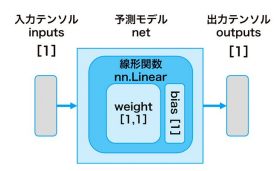

一方で，`torch.nn.Linear`を使用すると，下図のように入力と出力の重みwの数を指定できます．  
今回の場合，入力数を`n_input`，出力数を`n_output`としています．


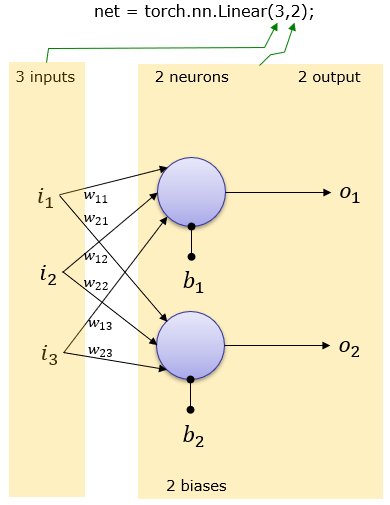

参考：https://www.sharetechnote.com/html/Python_PyTorch_nn_Linear_01.html

<br>

次に，定義した `Net` クラスを `net` という名前でインスタンス化します．

In [4]:
# 変数定義
# 入力次元数
n_input = x.shape[1]

# 出力次元数
n_output = 1
print(f"入力次元数： {n_input} 出力次元数： {n_output}")

# 1入力，1出力の線形モデルを生成
net = Net(n_input, n_output)

入力次元数： 1 出力次元数： 1


<br>

ここで，Netクラスの親クラス`torch.nn.Module`で定義されている以下の関数を使用することでパラメータの情報を取得できます．
- `named_parameters`を使用することで，モデル内の変数名とその値を取得でき，
- `parameters`関数を使用すると，「パラメータ変数」のみが名前なしにリスト形式で返されます

In [5]:
for parameter in net.named_parameters():
    print(f"変数名：{parameter[0]}")
    print(f"変数値：{parameter[1].data}")

print(" --------------- ")

for parameter in net.parameters():
    print(parameter)

変数名：l1.weight
変数値：tensor([[1.]])
変数名：l1.bias
変数値：tensor([1.])
 --------------- 
Parameter containing:
tensor([[1.]], requires_grad=True)
Parameter containing:
tensor([1.], requires_grad=True)


<br>

最後に，損失関数，最適化関数を用意します．  
損失関数は，前章では  
```
def mse(Yp, Y):
    loss = ((Yp - Y)**2).mean()
    return loss
```
といったように自分で定義していました．

`torch.nn.Linear` などと同様に，損失関数に関してもPyTorchで準備されています．  
今回使用する平均2乗誤差は
- `torch.nn.MSELoss`

という名前で実装されています．  

<br>

最適化関数に関しては，使用する関数は前章と同じですが，前章はパラメータが
```
optimizer = optim.SGD([W, B], lr=lr)
```
のようにWとBを直接指定していましたが，今回は，先ほど説明した `net.parameters()` を利用して最適化する対象のパラメータを指定しています．

In [6]:
import torch.optim as optim
# 損失関数：平均2乗誤差
criterion = torch.nn.MSELoss()

# 学習率
lr = 0.01

# 最適化関数：勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

<br>

実際に学習する際は， `torch.nn.MSELoss()` のインスタンスである `criteriion` 関数を使用して
```
loss = criterion(outputs, labels1) # outputs:モデルから出力された予測値， label1：正解値
```
のように損失を計算するのですが，その際に
- 引数はN次元のベクトルではなく，（N,1）次元の行列形式

である必要があるため， `label1` をあらかじめ(N,1)次元に変換しておきます．


In [7]:
labels = torch.tensor(yt).float() # 正解値yt

# 損失計算用に，labels変数を(N,1)次元の行列に変換
labels1 = labels.view((-1, 1))

# 次元確認
print(labels1.shape)

torch.Size([506, 1])


<br>
ここまでで準備が完了したので，実際に勾配を計算していくことにします．

### ①予測計算
先ほど作成したインスタンス化したモデル `net` に入力値 `inputs` を入力することで，予測値 `outputs` を得ることができます．

---
補足：  
これを具体的に言うと，`inputs` は，
```
class Net(torch.nn.Module):
    def __init__(self, n_input, n_output):
        # 親クラスnn.Moduleの初期化呼び出し
        super().__init__()

        # 出力層の定義
        self.l1 = torch.nn.Linear(n_input, n_output)

        # 初期値をすべて1にする
        torch.nn.init.constant_(self.l1.weight, 1.0)
        torch.nn.init.constant_(self.l1.bias, 1.0)

    # 予測関数の定義
    def forward(self, x):
        x1 = self.l1(x) # 線形回帰
        return x1   
```
内の

```
def forward(self, x):
    x1 = self.l1(x) # 線形回帰
    return x1 
```

の， `x` に引数として渡され，返り値 `x1` が `outputs` に代入されることになります．

---

In [8]:
inputs = torch.tensor(x).float() # 入力
outputs = net(inputs) # 出力
print(outputs)

tensor([[7.5750],
        [7.4210],
        [8.1850],
        [7.9980],
        [8.1470],
        [7.4300],
        [7.0120],
        [7.1720],
        [6.6310],
        [7.0040],
        [7.3770],
        [7.0090],
        [6.8890],
        [6.9490],
        [7.0960],
        [6.8340],
        [6.9350],
        [6.9900],
        [6.4560],
        [6.7270],
        [6.5700],
        [6.9650],
        [7.1420],
        [6.8130],
        [6.9240],
        [6.5990],
        [6.8130],
        [7.0470],
        [7.4950],
        [7.6740],
        [6.7130],
        [7.0720],
        [6.9500],
        [6.7010],
        [7.0960],
        [6.9330],
        [6.8410],
        [6.8500],
        [6.9660],
        [7.5950],
        [8.0240],
        [7.7700],
        [7.1690],
        [7.2110],
        [7.0690],
        [6.6820],
        [6.7860],
        [7.0300],
        [6.3990],
        [6.6020],
        [6.9630],
        [7.1150],
        [7.5110],
        [6.9980],
        [6.8880],
        [8

### ②損失計算
予測結果 `outputs` と正解値 `label1` を引数にして損失関数から損失を計算します．

In [9]:
# 損失の計算
loss = criterion(outputs, labels1)

print(f"{loss.item():.5f}")

308.44986


### ③勾配計算
勾配の計算は，backward関数を呼び出すだけでOKです．

In [10]:
# 誤差の逆伝播
loss.backward()

### ④パラメータ修正
誤差逆伝播した結果を反映させるために，step関数でパラメータ（weight, bias）を修正します．  
backward関数は，呼び出されるたびに値が加算されるため，パラメータの修正が終わったら**勾配値の初期化を忘れずにしましょう．**

In [11]:
# パラメータの修正
optimizer.step()

# 勾配値の初期化
optimizer.zero_grad()

### 繰り返し計算
これまでの①〜④の流れを繰り返し計算するように設定します． 

In [13]:
import numpy as np
# 学習率
lr = 0.01

# インスタンス生成　(パラメータ値初期化)
net = Net(n_input, n_output)

# 損失関数： 平均2乗誤差
criterion = torch.nn.MSELoss()

# 最適化関数: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 繰り返し回数
num_epochs = 50000

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))
## ここまで初期設定 ------------------------

# 繰り返し計算メインループ

for epoch in range(num_epochs):
    
    # 勾配値初期化
    optimizer.zero_grad()

    # 予測計算
    outputs = net(inputs)
  
    # 損失計算
    # 「ディープラーニングの数学」に合わせて2で割った値を損失としています
    loss = criterion(outputs, labels1) / 2.0

    # 勾配計算
    loss.backward()

    # パラメータ修正
    optimizer.step()

    # 100回ごとに途中経過を記録する
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 154.22493
Epoch 100 loss: 29.61752
Epoch 200 loss: 29.43177
Epoch 300 loss: 29.25043
Epoch 400 loss: 29.07340
Epoch 500 loss: 28.90058
Epoch 600 loss: 28.73186
Epoch 700 loss: 28.56716
Epoch 800 loss: 28.40636
Epoch 900 loss: 28.24939
Epoch 1000 loss: 28.09615
Epoch 1100 loss: 27.94654
Epoch 1200 loss: 27.80050
Epoch 1300 loss: 27.65792
Epoch 1400 loss: 27.51873
Epoch 1500 loss: 27.38285
Epoch 1600 loss: 27.25020
Epoch 1700 loss: 27.12070
Epoch 1800 loss: 26.99428
Epoch 1900 loss: 26.87086
Epoch 2000 loss: 26.75037
Epoch 2100 loss: 26.63275
Epoch 2200 loss: 26.51792
Epoch 2300 loss: 26.40582
Epoch 2400 loss: 26.29638
Epoch 2500 loss: 26.18955
Epoch 2600 loss: 26.08525
Epoch 2700 loss: 25.98343
Epoch 2800 loss: 25.88404
Epoch 2900 loss: 25.78700
Epoch 3000 loss: 25.69227
Epoch 3100 loss: 25.59979
Epoch 3200 loss: 25.50950
Epoch 3300 loss: 25.42137
Epoch 3400 loss: 25.33532
Epoch 3500 loss: 25.25132
Epoch 3600 loss: 25.16932
Epoch 3700 loss: 25.08927
Epoch 3800 loss: 25.011

### 結果の評価
学習曲線で結果を確認しましょう．

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32722 (\N{CJK UNIFIED IDEOGRAPH-7FD2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32218 (\N{CJK UNIFIED IDEOGRAPH-7DDA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25613 (\N{CJK UNIFIED IDEOGRAPH-640D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local

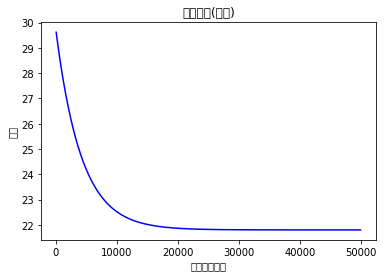

In [15]:
import matplotlib.pyplot as plt
# 学習曲線の表示 (損失) 
# 最初の1つを除く

plt.plot(history[1:,0], history[1:,1], 'b')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.show()

<br>
正しく学習できていることを確認できたと思うので，学習後のモデルから生成される1次関数のグラフを確認してみましょう．  

今回は，説明変数にあたる入力を「平均部屋数」，目的変数にあたる出力を「不動産価格」として学習していたので，グラフの結果より
- 平均部屋数が多い家ほど，不動産価格が高くなる傾向がある

という関係性がこのグラフから分かります．

[[-2.2188606]
 [45.21208  ]]


/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25955 (\N{CJK UNIFIED IDEOGRAPH-6563}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22259 (\N{CJK UNIFIED IDEOGRAPH-56F3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24112 (\N{CJK UNIFIED IDEOGRAPH-5E30}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/pyt

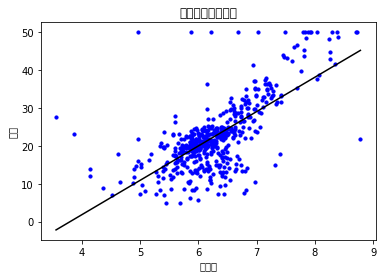

In [16]:
# 回帰直線の算出
# xの最小値、最大値
xse = np.array((x.min(), x.max())).reshape(-1,1)
Xse = torch.tensor(xse).float()

with torch.no_grad():
  Yse = net(Xse)

print(Yse.numpy())

# 散布図と回帰直線の描画
plt.scatter(x, yt, s=10, c='b')
plt.xlabel('部屋数')
plt.ylabel('価格')
plt.plot(Xse.data, Yse.data, c='k')
plt.title('散布図と回帰直線')
plt.show()

---

# 2値分類

線形回帰では，入力と出力の関係性を調べました．  
分類問題では，入力されたデータがどのカテゴリに所属するかを分類します．

今回使用する「アイリス・データセット」の場合
- 入力された画像（アヤメという名前の花）の品種

を分類します．  
<br>

特に，今回は2値分類問題なので
- 出力が「0」→ setosa（品種の種類1）
- 出力が「1」→ Versicolor（品種の種類2）

のように分類を行います．

---

## モデルの概要

モデルの概要は下図になります

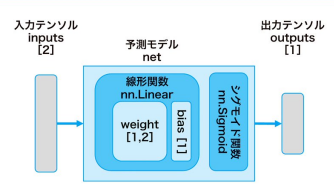

前章の線形回帰モデルと比較すると
- 後段にシグモイド関数が新たに加わっている

ことが分かります．  
  
これは，アルゴリズムの名称としては
- 「2値ロジスティック回帰モデル」

と呼ばれます．

---

## 精度（Accuracy）
線形回帰モデルでは，学習曲線によって損失がどの程度減少しているかを確認することでモデルの評価を行っていました．  
しかし，この損失がどの程度減っていれば「良いモデル」なのかといった明確な基準を決めるのは非常に難しいです．  

<br>

これに対して，本章で取り上げる2値分類は「正解値，予測値ともに1か0しかない」ため予測結果が正解かどうかを1件ごとに明確に判断可能です．

具体的には
- **（正解数）/（全体件数）**

によって，モデルがどの程度の比率で正しく予測できているかを数値化できます．  
この値は，機械学習では **「精度（accuracy）」** と呼ばれます．  

具体的な精度の算出方法のイメージは下図のとおりです．

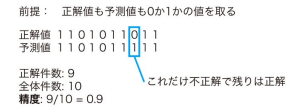

---

## 訓練データと検証データの分割
これまでの章では行ってきませんでしたが，学修データは「訓練データ」と「検証データ」の2種類に分ける必要があります．  
下図が学習データの分割のイメージ図です．  

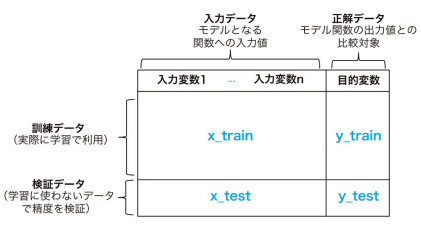

学習データを分ける比率にルールはありませんが，
- 訓練：検証 = 7:3または，6:4

にすることが多いです．

<br>  

検証データを用意する理由は，
- 学習したモデルが，学習データ以外に対しても精度が出るような汎用性を持っているか

を確認するためです．

逆に，学習データ以外に対して精度が出なくなってしまっている状態を **過学習** といいます．
この「過学習が起こっているかどうかを確認するのに必要になる」のが検証データになります．  

下図は典型的な過学習の例で，繰り返し回数が40回を超えたあたりで，検証データの精度が下がっていることがわかります．  
そのため，下図の場合は「40回以下程度の繰り返し回数で学習を終了することが適切である」と言えるでしょう．

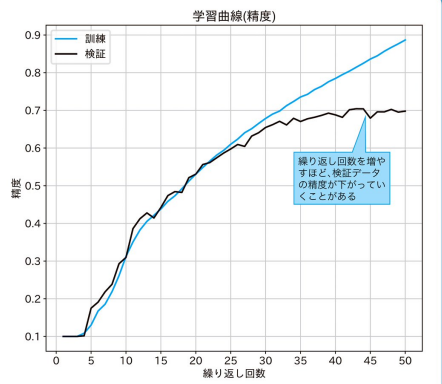


---

## シグモイド関数

分類問題では
- ネットワークからの出力をシグモイド関数に通したもの

が最終的な出力結果となります．  
ここで，以下のコードでシグモイド関数がどういったグラフになるのか確認してみましょう


In [ ]:
!pip install japanize_matplotlib | tail -n 1

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import torch
# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 14
# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (6,6)
# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True

# NumPy配列でxデータを定義
x_np = np.arange(-4, 4.1, 0.25)

# データをTensor形式に変換
x = torch.tensor(x_np).float()

# yの値を計算
y = torch.sigmoid(x)

# グラフ描画
plt.title('シグモイド関数のグラフ')
plt.plot(x.data, y.data)
plt.show()

上記のグラフをみてもらうと，
- 出力が0〜1の間に収まっている

ことがわかります．  
これを数式で記述すると以下のとおりです（ここで，$x$ は入力です）．　　
$$ f(x)=\frac{1}{1+exp(-x)}$$

また，シグモイド関数の特性は以下のとおりです
- 常に値が増加し続ける（単純増加関数）
- 0から1の間の値をとる
- x=0のときの値は0.5
- グラフは点(0, 0.5)に関して点対称

<br>

このように，シグモイド関数はすごく大きい値，もしくはすごく小さい値であっても必ず0〜1の間に収めてくれるため
- シグモイド関数からの出力が0.5以上ならば「1」に分類
- シグモイド関数からの出力が0.5未満ならば「0」に分類

といったようにすることで「0」か「1」かの2値分類に利用することができます．

  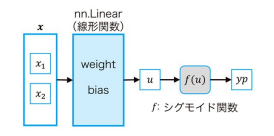


---

## 交差エントロピー誤差
分類モデルでは，損失関数に「交差エントロピー誤差」を使用します．  

<details>
<summary>交差エントロピー誤差の詳細</summary>

最初に，シグモイド関数の出力として得られる確率値は厳密に言うと「**入力データに対して分類結果が1になる確率** 」  

2値分類の場合，正解地は1か0なので「分類結果が1になる確率」が$f(u)$なら，「分類結果が0になる確率」は$1-f(u)$で表される  

5つのデータ系列に対して1次関数の結果がそれぞれ$u_1, u_2, u_3, u_4, u_5$で，正解値が$yt_1=1, yt_2=0, yt_3=0, yt_4=1, yt_5=0$の場合を例にすると，**「モデル確信度」（分類結果が正解の確率）**は，それぞれ  
$$f(u_1), 1-f(u_2), 1-f(u_3), f(u_4), 1-f(u_5)$$
となる  

ここで損失関数に最尤推定という考え方を導入する  
これは，「**すべてのデータに対する確信度を掛け合わせた結果を最大にするパラメータが一番もっともらしいので採用する**」という考え方  

つまり，上の5つのモデル確信度を例にすると，下記の関数を最大にするパラメータを探すこととなる  
$$f(u_1) \cdot 1-f(u_2)\cdot 1-f(u_3)\cdot f(u_4)\cdot 1-f(u_5)$$  

上記の式は，積なので**対数を取ることで和の形に変更**する（和の形の方が計算速度が早い）  
$$\log(f(u_1) \cdot 1-f(u_2)\cdot 1-f(u_3)\cdot f(u_4)\cdot 1-f(u_5))\\
=\log(f(u_1) + 1-f(u_2)+ 1-f(u_3)+ f(u_4)+ 1-f(u_5))$$  

さらに，次の変形を行うと確信度の組み合わせが変わった場合でも，場合分けすることなく対数を表現可能  
$$yt_i \cdot \log(f(u_i))+(1-yt_i)\cdot \log(1-f(u_i))$$
上記式に，$yt_i=1$，$yt_i=0$をそれぞれ代入すると確認できる  

すると，上式（対数尤度関数）は次のようになる  
$$\sum_{i=1}^{5} yt_i\cdot \log(f(u_i))+(1-yt_i)\cdot \log(1-f(u_i))$$  
この式の値は「**5件のデータの確信度の積が最も大きいとき（＝全てのデータの予測値と正解値が一致した時）最大になる**」  
**損失関数はできるだけ小さくすることが目標なので，この式にマイナスをかける**  
</details>

Pytorchでは，交差エントロピー関数は`torch.nn.BCELoss`という名前で実装されています．  


---

## データ準備
学習に必要なライブラリを読み込み，入力データと正解データを作成します．今回はscikit-learnライブラリに含まれている「アイリスデータセット」と呼ばれるデータセットを使用します．

In [17]:
from sklearn.datasets import load_iris

# データ読み込み
iris = load_iris()

# 入力データと正解データ取得
x_org, y_org = iris.data, iris.target

print("元データ", x_org.shape, y_org.shape)

# データ絞り込み
# アイリスデータセットは150行ある．今回は2値分類なので100行目までに含まれる「Setosa」と「versicolour」の正解データのみを抽出．
x_data = iris.data[:100,:2] # 列方向は最初の2列（spal（がく片）の長さと幅）のみを抽出
y_data = iris.target[:100]

print("対象データ", x_data.shape, y_data.shape)

元データ (150, 4) (150,)
対象データ (100, 2) (100,)


<br>

冒頭で述べた通り，訓練データと検証データへの分割を行います．  
今回は，scikit-learnの機能である`train_test_split`を使用してデータを分割します．  

- **順番を変えずに分割すると，データに偏りが出てしまい学習結果に影響が出てしまう可能性がある**

ので注意しましょう．今回の`train_test_split`の場合はシャッフルも同時に行ってくれるので気にしなくてもOKです．  

また，今回は`random_state`を固定の値に設定しています．この値を設定するとシャッフルする際の乱数値が固定になるので，分割結果を毎回同じにすることができます（このオプションについては，設定しなくても問題はありません．同じ結果を再現したい時などに利用するとよいでしょう）．

In [18]:
# 元のデータサイズ
print(x_data.shape, y_data.shape)

# 訓練データ，検証データに分割（シャッフルも同時に実施）
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, train_size=70, test_size=30,
    random_state=123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(100, 2) (100,)
(70, 2) (30, 2) (70,) (30,)


<br>

下記のコードで，データの散布図を表示してみると，直線を引くことで2つのグループに分割できそうなのがわかると思います．  

今回は，
- 2つのグループを最も上手く分割できる直線を学習する

ことが目的になります．

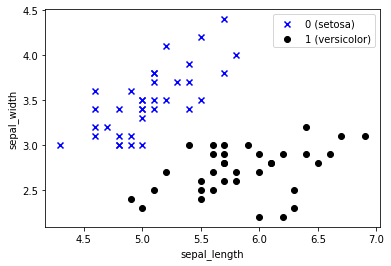

In [19]:
# 散布図の表示

x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
plt.scatter(x_t0[:,0], x_t0[:,1], marker='x', c='b', label='0 (setosa)')
plt.scatter(x_t1[:,0], x_t1[:,1], marker='o', c='k', label='1 (versicolor)')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()


---

## モデル定義

学習モデルを定義します．大まかな構成は線形回帰の時と同じですが，以下の点が異なります．

- モデルのforward関数内で入力テンソル `x` を線形関数 `self.l1`にかけた後，**その結果に対して，さらにシグモイド関数 `self.sigmoid` をかけたものを出力**としています．


In [22]:
# 入力次元数と出力次元数の定義 --------------------------
# 入力次元数（今回は2）
n_input = x_train.shape[1]

# 出力次元数
n_output = 1
print(f"n_input: {n_input} n_output:{n_output}")

# モデルの定義 ---------------------------------------
import torch
# モデルの定義
# 2入力，1出力のロジスティック回帰モデル

class Net(torch.nn.Module):
  def __init__(self, n_input, n_output):
    super().__init__()
    self.l1 = torch.nn.Linear(n_input, n_output)
    self.sigmoid = torch.nn.Sigmoid()

    # 初期値を全部1にする
    # 「ディープラーニングの数学」と条件を合わせる
    self.l1.weight.data.fill_(1.0)
    self.l1.bias.data.fill_(1.0)

  # 予測関数の定義
  def forward(self, x):
    # 最初に入力値を線形関数にかけた結果を計算
    x1 = self.l1(x)
    # 計算結果にシグモイド関数をかける
    x2 = self.sigmoid(x1)
    return x2

# インスタンスの生成 ---------------------------------------
net = Net(n_input, n_output)

# モデルの概要表示 ---------------------------------------
# 線形関数の後に，シグモイド関数が追加されている
print(net)

n_input: 2 n_output:1
Net(
  (l1): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


<br>

次に，最適化アルゴリズムと損失関数を定義します．  

今回は２値分類問題なので，
- 交差エントロピー関数を損失関数として定義

しています．

In [29]:
import torch.optim as optim
# 損失関数：交差エントロピー関数
criterion = torch.nn.BCELoss()

# 学習率
lr = 0.01

# 最適化関数：勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

損失の計算グラフを`make_dot`関数により確認してみると，下図のようになります（コード略）．線形関数の後にシグモイド関数があることが分かると思います．

  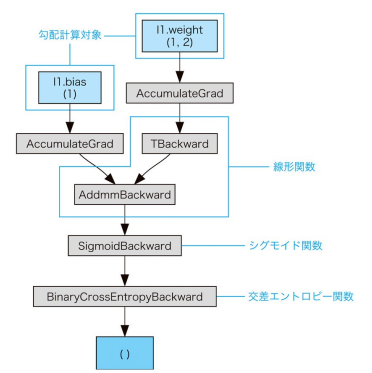


---

## 学習
最初に，学習を行うための準備をします．  

先ほど説明したように，今回は「訓練用データ」と「検証用データ」に分けるため
- 検証に使う`input_test`と`label_test`も精度評価用に準備します．

<br>  

また，損失関数`BCELoss`を使用する場合，正解データとしての第2引数は，第1引数とshapeが揃っている必要があります．

In [27]:
# 入力データx_trainと正解データy_trainのテンソル化

inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).float()

# 正解データをN行1列に変換
labels1 = labels.view((-1, 1))

# 検証データのテンソル化
inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).float()

# 検証用の正解データもN行1列の行列に変換
labels1_test = labels_test.view((-1, 1))

<br>

次に，実際に学習を行います．  
大まかな流れは，線形回帰の時と同じですが，以下の箇所が異なります．
- 「訓練フェーズ」と「予測フェーズ」に分かれています（線形回帰の時は，「訓練フェーズ」だけでした）．
    - 予測フェーズの時は，学習はしないので「勾配計算」「パラメータ修正」のステップがなくなっています．
- 以下の箇所で，モデルからの出力が0.5より大きいかどうかで，予測値が1か0かを判定しています．  
    ```
    predicted = torch.where(outputs < 0.5, 0, 1)
    ```
- 以下の箇所で，精度（（正解件数）/（全体件数））を計算しています．  
    ```
    train_acc = (predicted == labels1).sum() / len(y_train)
    ```

In [35]:
# 準備 -------------------------------
# 学習率
lr = 0.01

# 初期化
net = Net(n_input, n_output)

# 損失関数：交差エントロピー関数
criterion = torch.nn.BCELoss()

# 最適化関数：勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 繰り返し回数
num_epochs = 10000

# 記録用リストの初期化
history = np.zeros((0,5))


# 繰り返し計算メインループ---------------------
for epoch in range(num_epochs):
    # 訓練フェーズ ----------------------------------------
    
    #勾配値初期化
    optimizer.zero_grad()

    # 予測計算
    outputs = net(inputs)

    # 損失計算
    loss = criterion(outputs, labels1)

    # 勾配計算
    loss.backward()
    
    # パラメータ修正
    optimizer.step()

    # 損失の保存(スカラー値の取得)
    train_loss = loss.item()

    # 予測ラベル(1 or 0)計算
    predicted = torch.where(outputs < 0.5, 0, 1)
    
    # 精度計算
    train_acc = (predicted == labels1).sum() / len(y_train)

    # 予測フェーズ ---------------------------------------------------

    # 予測計算
    outputs_test = net(inputs_test)

    # 損失計算
    loss_test = criterion(outputs_test, labels1_test)

    # 損失の保存（スカラー値の取得）
    val_loss =  loss_test.item()
        
    # 予測ラベル(1 or 0)計算
    predicted_test = torch.where(outputs_test < 0.5, 0, 1)

    # 精度計算
    val_acc = (predicted_test == labels1_test).sum() / len(y_test)
    
    if ( epoch % 10 == 0):
        print (f'Epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
        item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))

Epoch [0/10000], loss: 4.77289 acc: 0.50000 val_loss: 4.49384, val_acc: 0.50000
Epoch [10/10000], loss: 3.80546 acc: 0.50000 val_loss: 3.56537, val_acc: 0.50000
Epoch [20/10000], loss: 2.84329 acc: 0.50000 val_loss: 2.64328, val_acc: 0.50000
Epoch [30/10000], loss: 1.91613 acc: 0.50000 val_loss: 1.76244, val_acc: 0.50000
Epoch [40/10000], loss: 1.17137 acc: 0.50000 val_loss: 1.08537, val_acc: 0.50000
Epoch [50/10000], loss: 0.84140 acc: 0.50000 val_loss: 0.81872, val_acc: 0.50000
Epoch [60/10000], loss: 0.77087 acc: 0.50000 val_loss: 0.77093, val_acc: 0.50000
Epoch [70/10000], loss: 0.75450 acc: 0.34286 val_loss: 0.76105, val_acc: 0.33333
Epoch [80/10000], loss: 0.74542 acc: 0.25714 val_loss: 0.75447, val_acc: 0.20000
Epoch [90/10000], loss: 0.73734 acc: 0.24286 val_loss: 0.74778, val_acc: 0.16667
Epoch [100/10000], loss: 0.72949 acc: 0.24286 val_loss: 0.74098, val_acc: 0.13333
Epoch [110/10000], loss: 0.72180 acc: 0.27143 val_loss: 0.73419, val_acc: 0.16667
Epoch [120/10000], loss: 0.


---

## 結果確認
学習結果を確認します．

初期状態: 損失: 4.49384 精度: 0.50000
最終状態: 損失: 0.15395 精度: 0.96667


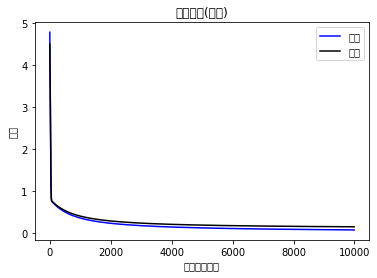

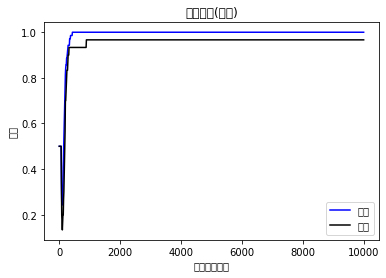

In [36]:
# 損失と精度の確認
print(f'初期状態: 損失: {history[0,3]:.5f} 精度: {history[0,4]:.5f}' )
print(f'最終状態: 損失: {history[-1,3]:.5f} 精度: {history[-1,4]:.5f}' )

# 学習曲線の確認(損失)
plt.plot(history[:,0], history[:,1], 'b', label='訓練')
plt.plot(history[:,0], history[:,3], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.legend()
plt.show()

# 学習曲線の確認(精度)
plt.plot(history[:,0], history[:,2], 'b', label='訓練')
plt.plot(history[:,0], history[:,4], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('精度')
plt.title('学習曲線(精度)')
plt.legend()
plt.show()

<br>

上記の結果を見ると，学習できているような気がします．  
次に，本当に上手く2つのクラスを分けるような直線を引くことができるのかを確認してみます．  
- 2つのクラスを分けるような直線を「決定境界」と呼びます．

BIAS = [0.33861226], WEIGHT = [[ 2.9700334 -5.300017 ]]
xl = [4.4 7. ]  yl = [2.52956916 3.98656204]


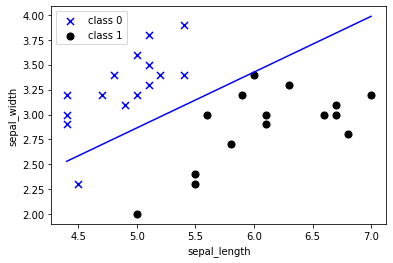

In [37]:
# 検証データを散布図用に準備
x_t0 = x_test[y_test==0]
x_t1 = x_test[y_test==1]

# パラメータの取得
bias = net.l1.bias.data.numpy()
weight = net.l1.weight.data.numpy()
print(f'BIAS = {bias}, WEIGHT = {weight}')

# 決定境界描画用 x1の値から x2の値を計算する
def decision(x):
    return(-(bias + weight[0,0] * x)/ weight[0,1])

# 散布図のx1の最小値と最大値
xl = np.array([x_test[:,0].min(), x_test[:,0].max()])
yl = decision(xl)

# 結果確認
print(f'xl = {xl}  yl = {yl}')

# 散布図表示
plt.scatter(x_t0[:,0], x_t0[:,1], marker='x', 
        c='b', s=50, label='class 0')
plt.scatter(x_t1[:,0], x_t1[:,1], marker='o', 
        c='k', s=50, label='class 1')

# 決定境界直線
plt.plot(xl, yl, c='b')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()



コードを実行した結果を見ると，決定境界が正しく生成できていることが確認できます．  
ちなみに，1つだけクラス0のサンプルがクラス1に分類されてしまっている（グラフ左下あたり）と思います．

左下のサンプルも含まれるように直線を引けば「今回入力したサンプルの場合」は完全な分類ができるのでそのほうが良いような気がします．しかし，ここに他の「未知のサンプル」が入ってきた場合は逆に全体としての分類精度が低下するかもしれません．  
このように，機械学習では
- （未知のサンプルも含めて）できるだけ多くのサンプルに対して正しく分類できる

ように学習します．逆に言えば，左下のサンプルのような，外れ値のサンプルに対しては正しい結果を求められないことも多々あります．


---

# 多値分類
前章の2値分類の問題を拡張して，多値分類の問題を扱います．   
2値分類との大きな違いは「出力数」になります．
- 多値分類では，分類先グループをNとした時に，N次元出力になります．
- また，これにより2値分類で使用していたシグモイド関数がsoftmax関数という別の関数へ変わります．
- 損失関数は，同じ交差エントロピー関数を使用しますが，形式が少し変わります．

---

## モデルの概要
今回のモデル図を以下に示します．  
モデル図を見ると活性化関数がないことが分かると思います．これは，多値分類の場合においてPytorch特有の独特な予測関数の定義方法があるためです．  
これについては，後程詳しく説明します．

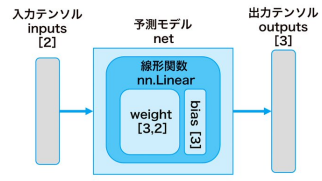



---

## 複数の分類器
多値分類器では
- N個の出力をN個の分類器と考えて
- それぞれの分類器の出力がそのグループである確率を求める

ことになります．そして
- 一番確率値の大きい分類器に該当するグループがモデルとしての予測値

となります．  
これを図で説明すると以下のようになります．

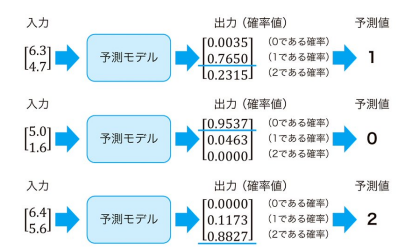


---

## 重み行列
多値分類では，出力数が1からNへと増加したので，1次関数もN個必要になります．  
これは
- 重みベクトルであったモデル内の変数が「重み行列」に変わる

ということです．イメージを下図に示します．
 
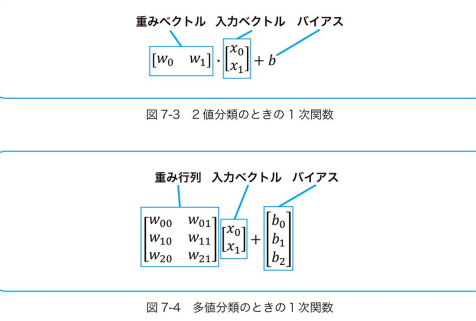




---

## ソフトマックス関数
多値分類ではsoftmax関数が活性化関数として使用されます．  
$$
y_i = \frac{\exp(x_i)}{\sum_{k=1}^{n}\exp(x_k)}
$$

softmax関数は
- 全ての出力を足すと1になり，これらの中で最も大きい出力を採用

します．計算例を下図に示します．

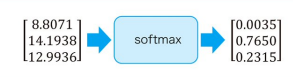



---

## 交差エントロピー関数
多値分類では2値分類と同様に交差エントロピー関数が使用されます．  
名前は同じですが，式は下記のように少し異なります
$$
\sum_{i=0}^{N-1}(yt_i\log(yp_i))
$$  

ここで，$yt_i$は正解の時に1，正解でないときに0の値を取ります．  

イメージ図は以下となります．

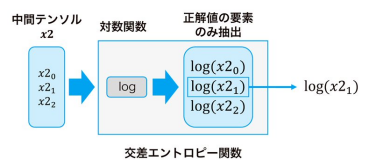  


具体的に説明すると
- まず．softmax関数からの出力すべてのlogを取ります．  
- そして「**正解値と対応する要素のみ**を抽出」します．

## 多値分類モデルにおける予測関数と損失関数の関係
ここでは「多値分類モデルにおける予測関数と損失関数の関係」について説明しますが，これはPytorch特有の問題となるため，理解が浅いうちは補足的なイメージで見てもらっても良いと思います．

最初に，多値分類における「損失」がPytorchでどのように実装されているかを下図に示します．  

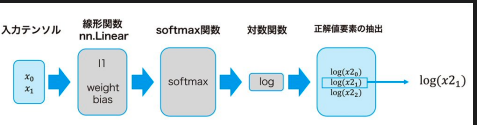

<br>

ここで，図を見ると「交差エントロピー関数」に対応する損失関数がPytorchでは実装されていないことがわかります．

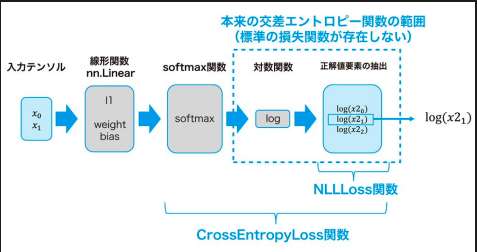

このような実装になっている理由としては
- 対数関数を独立して使うと不安定になるので必ず指数関数(シグモイド関数やsoftmax関数)とセットで使うべき

といったPytorch特有のポリシーがあるためです．

<br>

そのため，Pytorchで多値分類を実装する方法は下記の2種類のみになります（自作の関数を用いる場合を除く）．

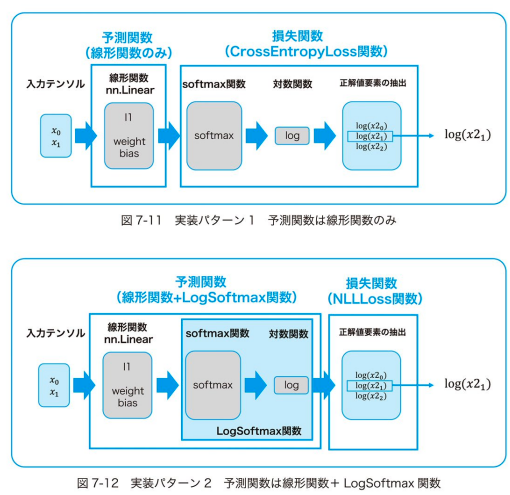

PyTorchでは実装パターン1が採用されることが多いです．

パターン1の実装の原則は以下になります．  
- 予測関数側では，活性化関数は不要で，**線形関数の出力をそのまま出力とする**
- 予測関数出力から**確率値を得たい場合は，予測関数出力にsoftmax関数をかける**
- **損失関数はCrossEntropyLoss関数**
- CrossEntropyLoss関数はその最終段がnn.NLLLoss関数なので．**第2引数として引き渡す正解値はNLLLoss関数同様に整数値にする必要**がある


---

## データの準備
学習データの準備を行います．  
「出力が3種類」である以外は，2値分類の時と同じです．


In [38]:
# 学習用データ準備 ------------------
# ライブラリのインポート
from sklearn.datasets import load_iris

# データ読み込み
iris = load_iris()

# 入力データと正解データ取得
x_org, y_org = iris.data, iris.target

# 結果確認
print('元データ', x_org.shape, y_org.shape)

# データ絞り込み -----------------------
# 入力データはsepal（がく片）length(0)とpetal（花弁）length(2)のみ抽出
x_select = x_org[:,[0,2]]

print("元データ", x_select.shape, y_org.shape)


# 訓練データと検証データの比較 --------------
# 今回は，分割の比率を75件対75件にしている．また，パラメータは比率でも表せるため，0.5対0.5で指定しても同じ
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_select, y_org, train_size=75, test_size=75,
    random_state=123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

元データ (150, 4) (150,)
元データ (150, 2) (150,)
(75, 2) (75, 2) (75,) (75,)


<br>

データの散布図を確認します．

In [ ]:
!pip install japanize_matplotlib | tail -n 1

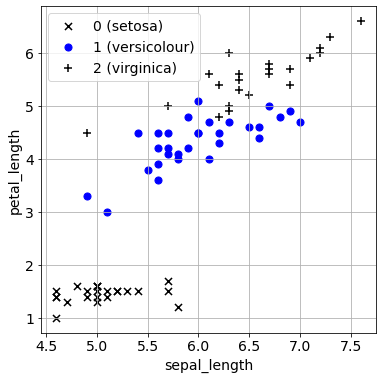

In [40]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 14
# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (6,6)
# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True
# numpyの表示桁数設定
np.set_printoptions(suppress=True, precision=4)

# データを正解値ごとに分割
x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
x_t2 = x_train[y_train == 2]

# 散布図の表示
plt.scatter(x_t0[:,0], x_t0[:,1], marker='x', c='k', s=50, label='0 (setosa)')
plt.scatter(x_t1[:,0], x_t1[:,1], marker='o', c='b', s=50, label='1 (versicolour)')
plt.scatter(x_t2[:,0], x_t2[:,1], marker='+', c='k', s=50, label='2 (virginica)')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()
plt.show()


---

## モデル定義
モデルの定義を行います．   
先程説明した通り，
- 損失関数側で活性化関数をカバーしているため，forwar関数で活性化関数の部分がなくなっており，単純に線形関数の結果を返している

ことが分かります．

In [42]:
# 学習用パラメータ設定 --------------------
# 入力次元数
n_input = x_train.shape[1]

# 出力次元数
# 分類先クラス数　今回は3
n_output = len(list(set(y_train)))

print(f"n_input: {n_input} n_output: {n_output}")

import torch

# モデルの定義 ---------------------------------
# 2入力3出力のロジスティック回帰モデル
class Net(torch.nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = torch.nn.Linear(n_input, n_output)
                
        # 初期値を全部1にする
        # 「ディープラーニングの数学」と条件を合わせる目的        
        self.l1.weight.data.fill_(1.0)
        self.l1.bias.data.fill_(1.0)

    def forward(self, x):
        x1 = self.l1(x)
        return x1
    
# インスタンスの生成 -----------------------
net = Net(n_input, n_output)  

n_input: 2 n_output: 3


<br>

次に最適化アルゴリズムと損失関数を定義します．  
2値分類の時との変更点は以下の通りです．
- 損失関数に`torch.nn.CrossEntropyLoss`クラスを利用しています．
    - この関数では **「softmax関数」「対数関数」「正解地要素の抽出」** の3つをまとめて行なっていることに注意してください． 

In [44]:
import torch.optim as optim

# 損失関数：交差エントロピー関数
criterion = torch.nn.CrossEntropyLoss()

# 学習率
lr = 0.01

# 最適化関数：勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)


---

## 学習

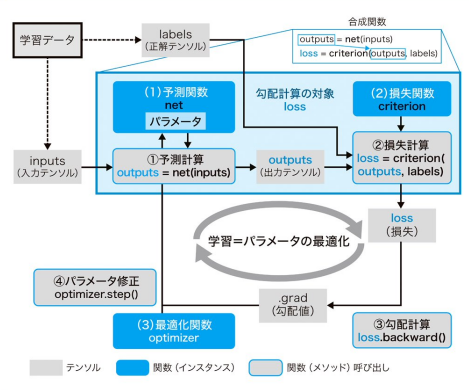

最初に，学習に必要な準備を行います．  
2値分類の時の変更点としては以下の通りです．
- `y_train`と`y_test`にfloat関数の代わりにlong関数を呼び出しています．
    - これは，学習で `loss = criterion(outputs, labels)`のように損失関数の第2引数として指定する際に，整数である必要があるためです．

In [45]:
# 入力データx_trainと正解データy_trainのテンソル変数化

inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).long()

# 検証データのテンソル変数化
inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).long()

<br>

次に予測値ラベルの取得方法について説明します．  
本来は
- softmax関数の出力値のうち，一番大きい（1に一番近い）値を出力した分類器を予測値とする

のが正しいラベルの計算方法になります．

<br>

しかし，以下コードでは
- softmax関数にかける前の`outputs`に対して，一番大きい値を求めています．

これは，softmax関数が「入力の段階で最大であった項目が出力後も最大になる性質を持っている」という理由からです．



In [46]:
# torch.max関数を呼び出し
# 2つ目の引数は軸を意味する．1だと行ごとの集計
print(torch.max(outputs, 1))

torch.return_types.max(
values=tensor([0.0159, 0.9475, 0.0037, 0.9764, 0.6170, 0.9990, 0.7970, 0.9672, 0.9985,
        0.2133, 0.1620, 0.9684, 0.0149, 0.8135, 0.2673, 0.9816, 0.0315, 0.9703,
        0.0257, 0.9919, 0.0135, 0.0557, 0.9158, 0.2133, 0.0177, 0.9034, 0.1376,
        0.0094, 0.9970, 0.0335, 0.0023, 0.9347, 0.0535, 0.0579, 0.0062, 0.0379,
        0.9898, 0.9738, 0.8321, 0.0810, 0.0335, 0.1768, 0.0591, 0.9879, 0.0557,
        0.0285, 0.8767, 0.9525, 0.9189, 0.0735, 0.0652, 0.9628, 0.9189, 0.0910,
        0.9992, 0.9812, 0.1328, 0.9421, 0.8696, 0.3293, 0.0094, 0.0026, 0.9738,
        0.0493, 0.9783, 0.8977, 0.9791, 0.0446, 0.9778, 0.7447],
       grad_fn=<MaxBackward0>),
indices=tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))


<br>

上記のコードの`torch.max`では，最大値そのもの（values）と最大値をとったインデックス（indices）の2つを同時に返すようになっています．  
今回の場合，ラベルの値のみを取得したいので，下記コードのように2つ目のindiciesのみをとって来ればよいことになります．

In [47]:
# 予測データのリストを取得
torch.max(outputs, 1)[1]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

<br>

それでは，以上の追加点を考慮して作成した繰り返し処理(学習)が以下コードになります．

In [48]:
# 準備 -----------------------------
# 学習率
lr = 0.01

# 初期化
net = Net(n_input, n_output)

# 損失関数： 交差エントロピー関数
criterion = torch.nn.CrossEntropyLoss()

# 最適化関数: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 繰り返し回数
num_epochs = 10000

# 評価結果記録用
history = np.zeros((0,5))

# 繰り返し処理 -----------------------
for epoch in range(num_epochs):

    # 訓練フェーズ
    
    #勾配の初期化
    optimizer.zero_grad()

    # 予測計算
    outputs = net(inputs)

    # 損失計算
    loss = criterion(outputs, labels)

    # 勾配計算
    loss.backward()
    
    # パラメータ修正
    optimizer.step()

    # 予測ラベル算出
    predicted = torch.max(outputs, 1)[1]

    # 損失と精度の計算
    train_loss = loss.item()
    train_acc = (predicted == labels).sum()  / len(labels)

    #予測フェーズ

    # 予測計算
    outputs_test = net(inputs_test)

    # 損失計算
    loss_test = criterion(outputs_test, labels_test)

    # 予測ラベル算出
    predicted_test = torch.max(outputs_test, 1)[1]

    # 損失と精度の計算
    val_loss =  loss_test.item()
    val_acc =  (predicted_test == labels_test).sum() / len(labels_test)
    
    if ((epoch) % 10 == 0):
        print (f'Epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
        item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))


Epoch [0/10000], loss: 1.09861 acc: 0.30667 val_loss: 1.09263, val_acc: 0.26667
Epoch [10/10000], loss: 1.03580 acc: 0.40000 val_loss: 1.06403, val_acc: 0.26667
Epoch [20/10000], loss: 1.00477 acc: 0.40000 val_loss: 1.03347, val_acc: 0.26667
Epoch [30/10000], loss: 0.97672 acc: 0.40000 val_loss: 1.00264, val_acc: 0.26667
Epoch [40/10000], loss: 0.95057 acc: 0.41333 val_loss: 0.97351, val_acc: 0.26667
Epoch [50/10000], loss: 0.92616 acc: 0.48000 val_loss: 0.94631, val_acc: 0.38667
Epoch [60/10000], loss: 0.90338 acc: 0.69333 val_loss: 0.92098, val_acc: 0.56000
Epoch [70/10000], loss: 0.88212 acc: 0.70667 val_loss: 0.89740, val_acc: 0.60000
Epoch [80/10000], loss: 0.86227 acc: 0.70667 val_loss: 0.87545, val_acc: 0.61333
Epoch [90/10000], loss: 0.84373 acc: 0.70667 val_loss: 0.85500, val_acc: 0.62667
Epoch [100/10000], loss: 0.82640 acc: 0.70667 val_loss: 0.83594, val_acc: 0.62667
Epoch [110/10000], loss: 0.81019 acc: 0.72000 val_loss: 0.81815, val_acc: 0.62667
Epoch [120/10000], loss: 0.


---

### 結果の確認
学習結果の確認を行います．  
精度の学習曲線を見てみると，訓練データよりも検証データの方が良くなっていることが分かりますが，データの分割方法によってはこのような結果になることもあります．  
例えば，「データ件数が少ない」「外れ値がどちらに入っているか」といった理由で精度が大きく変わることがあります．

初期状態: 損失: 1.09263 精度: 0.26667
最終状態: 損失: 0.19795 精度: 0.96000


/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32722 (\N{CJK UNIFIED IDEOGRAPH-7FD2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32218 (\N{CJK UNIFIED IDEOGRAPH-7DDA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25613 (\N{CJK UNIFIED IDEOGRAPH-640D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local

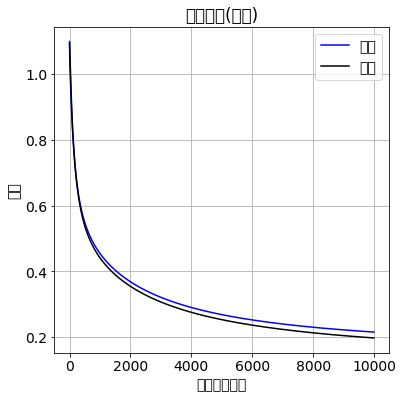

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31934 (\N{CJK UNIFIED IDEOGRAPH-7CBE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


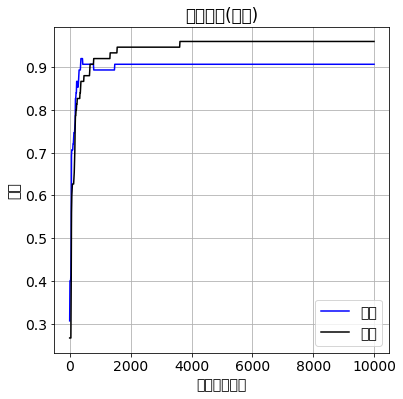

In [49]:
# 損失と精度の確認 --------------
print(f'初期状態: 損失: {history[0,3]:.5f} 精度: {history[0,4]:.5f}' )
print(f'最終状態: 損失: {history[-1,3]:.5f} 精度: {history[-1,4]:.5f}' )

# 学習曲線の表示 (損失) --------------
plt.plot(history[:,0], history[:,1], 'b', label='訓練')
plt.plot(history[:,0], history[:,3], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.legend()
plt.show()

# 学習曲線の表示 (精度) -------------------
plt.plot(history[:,0], history[:,2], 'b', label='訓練')
plt.plot(history[:,0], history[:,4], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('精度')
plt.title('学習曲線(精度)')
plt.legend()
plt.show()



<br>

次に，モデルの出力の確認を行いたいですが，今回はsoftmax関数が損失関数側に含まれてしまっているため，
- モデルの出力がどんな数値になっているか
- そこから確率値を取得したい場合どうしたらいいか

について説明したいと思います．

<br>

まず正解データの先頭の方から，値が0,1,2のものを1つずつ抜き出します．

In [50]:
print(labels[[0,2,3]])

tensor([1, 0, 2])


<br>

次に，同様のインデックスで`inputs`のデータを検出します．

In [51]:
i3 = inputs[[0,2,3],:]
print(i3.data.numpy())

[[6.3 4.7]
 [5.  1.6]
 [6.4 5.6]]


<br>

最後に，
- 絞り込んだi3を引数にnet関数を呼び出し，
- その結果をo3に格納し，
- また，o3をsoftmax関数にかけた結果をk3に格納します．

上記の手順によりnet関数の出力の確率値を取得できます．

In [53]:
softmax = torch.nn.Softmax(dim=1)
o3 = net(i3)
k3 = softmax(o3)
print("学習後のモデルからの出力", o3.data.numpy())
print("モデルの出力にsoftmax関数をかけた結果", k3.data.numpy())

学習後のモデルからの出力 [[ 8.8071 14.1938 12.9986]
 [12.8262  9.8     0.1734]
 [ 6.7954 15.0928 17.1111]]
モデルの出力にsoftmax関数をかけた結果 [[0.0035 0.765  0.2315]
 [0.9537 0.0463 0.    ]
 [0.     0.1173 0.8827]]



---

# MNISTを使った数字認識
今回は，「MNIST 手書きデータセット」と呼ばれる学習データを利用します．  
問題としては，
- 「手書きで書かれた0〜9の間の数字」が入力された時に，「手書きで書かれた数字の正しい分類結果」を出力

するように学習することが目的となります．    

<br>

前章までと比較して
- 画像データを扱う

部分が大きく異なります．

<br>

手書き数字の画像データがどのような形式で表現されているかを下図に示します．

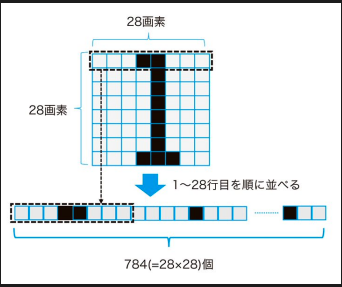



特徴としては以下のようになります．
- 画像データは縦，横それぞれ28画素
- 画素ごとの色の濃淡は0から255
    - ただし，Pytorchライブラリ経由で取得する場合[0, 1]の範囲の浮動小数点表現に正規化されます．
- Pytorchで取得する場合，このデータは[1, 28, 28]の3階のテンソルになります．
    - これは[チャンネル数，x方向の長さ, y方向の長さ]という意味です．（チャンネル数：今回は白黒画像なので１チャンネルになります．RGB画像なら3チャンネルです）
- 今回は，「全結合型ニューラルネットワーク」を使用するため，上図のように28×28の画像を748(=28×28)の要素を持った1次元配列に変更したものを入力とします．
- 数字は0〜9の10種類あるため，分類先のクラス数は10個になります．


<br>

本章のモデルは，下図のように線形関数が2段階になっています．これは，いわゆる「隠れ層あり」のモデルであることを意味します．

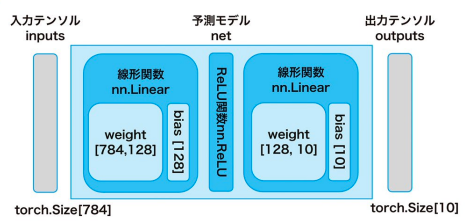

<br>

以上をまとめると，今回作成するモデルは
- 「入力784次元，出力10次元，隠れ層あり」のニューラルネットワーク

ということになります．



---


# ニューラルネットワークとディープラーニング
ディープラーニングは下図のように，線形関数が2階層以上のモデルのことを言います．  

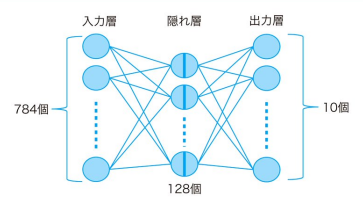


---

## 活性化関数とReLU関数
最初に，注意しておきたい点として，階層の深いニューラルネットワークについては
- 単なる線形関数の結果を次の隠れ層の入力にするだけでは，いくら層を深くしても1階層のモデルと数学的に変わらない

ということが分かっています．

<br>

そこで，階層の深いニューラルネットワークでは「非線形関数」と呼ばれる関数を作用させる必要があります．
この関数は，機械学習の世界では活性化関数と呼ばれ，本章では
- ReLU関数

を利用します．

<br>

ReLU関数のグラフを下記コードで確認してみましょう．  
特徴として，
  - ReLU関数では，x<0の時には0，x=>0では，y=xの1次関数を出力

するといった関数になります．  
これは，非常にシンプルですが，x=0で別の関数に切り替わるため，結果的に「**非線形関数**」の1つとなり**ディープラーニング用の活性化関数として意味を持つ**ことになります． 

In [ ]:
!pip install japanize_matplotlib | tail -n 1

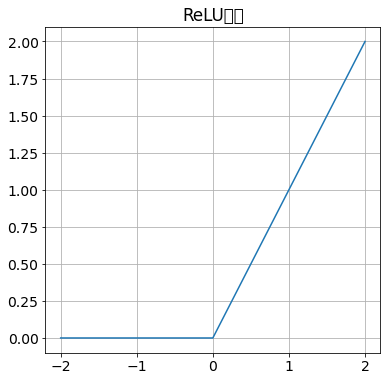

In [54]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import display
import torch
# warning表示off
import warnings
warnings.simplefilter('ignore')
# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 14
# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (6,6)
# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True
# numpyの表示桁数設定
np.set_printoptions(suppress=True, precision=5)

# ReLU関数のグラフ
relu = torch.nn.ReLU()
x_np = np.arange(-2, 2.1, 0.25)
x = torch.tensor(x_np).float()
y = relu(x)

plt.plot(x.data, y.data)
plt.title('ReLU関数')
plt.show()


---

## GPUの利用

本章で使用するモデルは，前章までに比べて計算量が多くCPUでは処理に時間がかかり過ぎてしまうため，ここからはGPUを利用して学習を行います．  
Pytorchでは，プログラムで自動的にGPUが「利用されない」ので注意する必要があります．

<br>

まず，google colablatoryの現在のランタイムが「GPU」に設定されていることを確認してください．  
確認ができたら，以下のコードで，GPUの存在をチェックします．

`cuda:0`と出力されれば，GPUが正しく認識されています．逆に，`cpu`と表示されている場合は，GPUが認識されていないので，ランタイムの設定を確認してみてください．

In [55]:
# デバイスの割り当て
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


<br>

PytorchでGPUを利用する際のルールとして以下のようなものがあります．
- テンソル変数はデータがCPU/GPU上のどちらにあるのかを属性として持っています
- CPUとGPU間でデータはto関数で転送します
- 2つの変数の両方ともがGPU上にある場合，演算はGPUで行われます
- 変数の片方がCPU,もう片方がGPUの場合，演算はエラーとなります

以下のコードではCPUで演算されていることになります．

In [56]:
# テスト用テンソル変数x,y
x_np = np.arange(-2.0, 2.1, 0.25)
y_np = np.arange(-1.0, 3.1, 0.25)
x = torch.tensor(x_np).float()
y = torch.tensor(y_np).float()

# xとyの間の演算
z = x*y
print(z)

tensor([ 2.0000,  1.3125,  0.7500,  0.3125, -0.0000, -0.1875, -0.2500, -0.1875,
         0.0000,  0.3125,  0.7500,  1.3125,  2.0000,  2.8125,  3.7500,  4.8125,
         6.0000])


次に，テンソル変数をGPUに送ってみましょう．  
テンソル変数は
- to関数を利用することで，CPU->GPU，GPU->CPUに転送

することができます．  
また，テンソル変数はdevice属性を持っており，これによりCPU/GPUのどちらに所属しているかを確認することができます．  

<br>

まずは，`x`のみをGPUに送って見ましょう．


In [ ]:
# 変数xをGPUへ
x = x.to(device)

# 変数xとyのdevice属性の確認
print("x: ", x.device)
print("y: ", y.device)

<br>

現在の状態では，`x`のみがGPU側に転送されており，`y`はCPU側に残っています．  
この状態で，`z=x+y` のような演算をするとエラーが起こってしまいます．  
そのため，`y`もGPU側に送ってから演算を行いましょう．

In [ ]:
# yもGPUへ
y = y.to(device)

z = x*y
print(z)

<br>

モデルのインスタンス（前章までで，`net`としていたもの）についてもGPUに所属しているかどうかを意識する必要があります．  
理由としては，「モデルの内部には線形関数などのインスタンスが含まれており，そこにはインスタンス変数があるため」です．  

例として，以下のように記述することでモデルのインスタンスをGPU側に送ることができます．  
```
net = Net(n_input, n_output, n_hidden).to(device)
```



---

## データ前処理
ここでは，学習データをモデルに入力する前に加工を行います．これはデータ前処理と呼ばれます．  
データ前処理の例としては，以下のようなものがあります．
- 値の範囲の変更：[0,1]の範囲を[-1,1]の範囲へ変更
- 次元の変更：1件のデータが[1,28,28]の3階テンソルを[784]の1階テンソルへ変更

Pytorchには前処理に必要な便利な関数が揃っているため，これらを活用することでデータの変換が可能になります．



---

## ミニバッチ学習

今回は，学習するデータが6万件もあるため，全件をまとめて勾配計算すると，1回の処理に時間がかかりすぎるため効率が悪くなってしまいます．（ちなみに，全件まとめて勾配を計算する方法は「バッチ学習」と呼ばれます．）  

そこで，
- グループ単位で勾配を計算する方法

である「ミニバッチ学習」を行います．  
また，ミニバッチ学習はグループを選ぶ際に乱数を使用することで，繰り返し処理ごとに別のグループができるので，
- 勾配降下法における局所最適解に陥ることを避けることができる

といったメリットも存在します．  

<br>

Pytorchでは，このミニバッチ学習を簡単に行えるデータローダーという仕組みが用意されています．






---

## データ準備1（データセットによる読み込み）
Pytorchには，データ準備のための道具が豊富で
- データ入手には「Dataset」
- データ加工には「transforms」
- ミニバッチ用データ生成には「DataLoader」

など様々な専用のクラスが用意されています．

<br>

最初に，Datasetクラスのインスタンスの1つである  `datasets.MNIST` を利用して，MNISTのデータセットを読み込みます．

In [ ]:
!pip install torchviz | tail -n 1

In [ ]:
# ライブラリのインポート
import torchvision.datasets as datasets

# ダウンロード先ディレクトリ名
data_root = "./data"

train_set0 = datasets.MNIST(
    # 元データダウンロード先の指定
    root = data_root,
    # 訓練データか検証データか
    train = True,
    # 元データがない場合に，ダウンロードするかどうか
    download = True
)

In [ ]:
# ダウンロードしたファイルの確認
! ls -lR ./data/MNIST

<br>

読み込んだデータセット`train_set0`はPythonのリストとして「入力データ，正解データ」のセットを順に取得できます．

In [ ]:
print("データ件数: ", len(train_set0))

# 最初の要素の取得
image, label = train_set0[0]

print("入力データの型：", type(image))
print("正解データの型：", type(label))


# 最初の要素の確認 ------------
plt.figure(figsize=(2,3))
plt.title(f'{label}')
plt.imshow(image, cmap='gray_r')
plt.axis('off')
plt.show()


---

## データ準備2（Transformsによるデータ前処理）

ここでは，以下の3つのデータ前処理をTransformsを用いて行います．
- データのテンソル化
- データの正規化
- データの1次元化

<br>

なお，データの正規化は$Normalize(\mu, \sigma)$により，元のデータ$x$は$X=(x-\mu)/\sigma$に変換されます．
- 下コードのように．$\mu=\sigma=0.5$とすると，[0,1]の範囲の値$x$を[-1,1]の範囲の値$X$に変換可能です．

In [ ]:
import torchvision.transforms as transforms
# データ変換用関数 Transforms
# (1) Imageをテンソル化
# (2) [0, 1]の範囲の値を[-1, 1]の範囲にする
# (3) データのshapeを[1, 28, 28]から[784]に変換

# transforms.Composeを利用することで，複数の処理を組み合わせたtransformsを作成可能
transform = transforms.Compose([
    # (1) データのテンソル化(テンソル変数に変換，この時点では，shapeは[1,28,28]，最小値が0，最大値が1になっている)
    transforms.ToTensor(),
    
    # (2) データの正規化(データの正規化を[0,1]から[-1,1]に変更)
    transforms.Normalize(0.5, 0.5),
    
    # (3) 1階テンソルに変換（shapeを[1,28,28]から[784]に変更）
    transforms.Lambda(lambda x: x.view(-1)),
])

<br>

これで，transformsによるデータ変換の準備ができたので，この設定をもとにデータセットを作成します．

In [ ]:
# データ取得用関数 Dataset

# 訓練用データセットの定義
train_set = datasets.MNIST(
    root = data_root, train = True,
    download = True, transform = transform)

# 検証データセットの定義
test_set = datasets.MNIST(
    root = data_root, train = False, 
    download = True, transform = transform)

上記のような考え方を拡張すれば，データセットに独自のクラスを定義することも可能です． 

**オブジェクト指向の考えをうまく取り入れて，機械学習モデル構築における2大タスクである「データ準備」と「モデル構築」をきれいに切り分けることが可能になります．**


---

# データ準備3（データローダーによるミニバッチ用データ生成）
データ準備の最終タスクとしてミニバッチ処理の準備を行います．  

このタスクでは，PyTorchのデータローダー（DataLoader）というクラスを利用します．

In [ ]:
from torch.utils.data import DataLoader

# ミニバッチのサイズ指定
batch_size = 500

# 訓練用データローダー
# 訓練用なので，シャッフルする
train_loader = DataLoader(
    train_set, batch_size = batch_size, 
    shuffle = True
)

# 検証用データ
# 検証用にシャッフルは不要
test_loader = DataLoader(
    test_set, batch_size = batch_size, 
    shuffle = False
)

# データローダーのテスト ---------------------
# データローダーではlen関数で何組のデータが取れるか確認してみます
# 以下を実行すると，120は60000/500の結果と一致していることが分かります．

# 何組のデータが取得できるか
print(len(train_loader))

# データローダーから最初のセットを取得
for images, labels in train_loader:
  break

print(images.shape)
print(labels.shape)


---

## モデル定義
モデルの定義を行います．  
前章までと異なる点は以下の通りです．
- 隠れ層が存在するため，隠れ層のノード数も定義します（今回の場合は128に設定）．
- 線形関数(`nn.Linear`）が1つから2つに増加しています．
- ReLU関数が追加されています．
    - なお，2層目（出力層）の線形関数の出力に対しては活性化関数がありませんが，これは前章と同様に「損失関数側にsoftmax関数が組み込まれているため」です．
- パラメータを1.0にする設定がなくなっています．これは，モデルのパラメータが増大したことにより，1.0に統一するとうまく学習できないためです．
    - このため，初期設定である「乱数を使った初期化」に変更されています．

In [ ]:
# 入力，出力次元数の定義 --------------------------------------
# 入力次元数
n_input = image.shape[0]

# 出力次元数
# 分類先クラス　今回は10
n_output = len(set(list(labels.data.numpy())))

# 隠れ層のノード数
n_hidden = 128

print(f"n_input: {n_input} n_hidden: {n_hidden} n_output: {n_output}")


# モデルの定義 --------------------------------------
# 784入力　10出力　1隠れ層のニューラルネットワークモデル

class Net(nn.Module):
  def __init__(self, n_input, n_output, n_hidden):
    super().__init__()

    # 隠れ層の定義
    self.l1 = torch.nn.Linear(n_input, n_hidden)

    # 出力層の定義
    self.l2 = torch.nn.Linear(n_hidden, n_output)

    # ReLU関数の定義
    self.relu = torch.nn.ReLU(inplace = True)

  def forward(self, x):
    x1 = self.l1(x)
    x2 = self.relu(x1)
    x3 = self.l2(x2)
    return x3


# モデルのインスタンス化 --------------------------------------
# 乱数の固定化
torch.manual_seed(123)
torch.cuda.manual_seed(123)

# モデル変数の生成
net = Net(n_input, n_output, n_hidden)

# モデルをGPU側に送る
net = net.to(device)

# 最適化アルゴリズムと損失関数の定義 ----------------------------------
# 学習率
lr = 0.01

# アルゴリズム: 勾配降下法
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

# 損失関数： 交差エントロピー関数
criterion = nn.CrossEntropyLoss()

<br>

ここで，モデル内のパラメータを確認してみると
- 前章までは，変数がl1.weightとl1.biasの2つだったが，l2.weightとl2.biasが増えており，
- device='cuda:0'の表示がある

ということが分かります．

In [ ]:
# モデル内のパラメータの確認
# l1.weight, l1.bias, l2.weight, l2.biasがあることがわかる

for parameter in net.named_parameters():
  print(parameter)


---

# 学習

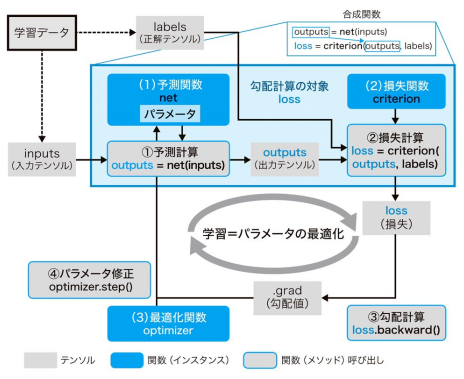


これまでの説明を元に繰り返し処理（学習）を行います．  
変更点としては，以下の通りになります
- ミニバッチ処理でも繰り返し計算が入ることで2重の繰り返しループになっています．
    - これにより，データローダから楽手データを取り出すたびにデータをGPUに送る処理が必要になっています．
- 訓練フェーズでミニバッチ処理ようにループを回す際に，tqdm関数を経由しています．
  ```
  rom tqdm.notebook import tqdm
  for inputs, labels in tqdm(train_loader):
  ```  
  これは，必須ではありませんが，プログレスバーが表示されることになり，学習の進行具合が分かりやすく可視化することができます．

In [ ]:
import torch.optim as optim

# 準備 --------------------------------------------
# 乱数の固定化
torch.manual_seed(123)
torch.cuda.manual_seed(123)
torch.backends.cudnn.deterministic = True
torch.use_deterministic_algorithms = True

# 学習率
lr = 0.01

# モデルインスタンス生成
net = Net(n_input, n_output, n_hidden).to(device)

# 損失関数： 交差エントロピー関数
criterion = nn.CrossEntropyLoss()

# 最適化関数: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 繰り返し回数
num_epochs = 100

# 評価結果記録用
history = np.zeros((0,5))

# 繰り返し処理 ----------------------------------------------
# tqdmライブラリのインポート
from tqdm.notebook import tqdm

# 繰り返し計算メインループ

for epoch in range(num_epochs):
    train_acc, train_loss = 0, 0
    val_acc, val_loss = 0, 0
    n_train, n_test = 0, 0

    # 訓練フェーズ
    for inputs, labels in tqdm(train_loader):
        n_train += len(labels)

        # GPUヘ転送
        inputs = inputs.to(device)
        labels = labels.to(device)
    
        #勾配の初期化
        optimizer.zero_grad()

        # 予測計算
        outputs = net(inputs)

        # 損失計算
        loss = criterion(outputs, labels)

        # 勾配計算
        loss.backward()
    
        # パラメータ修正
        optimizer.step()

        # 予測ラベル導出
        predicted = torch.max(outputs, 1)[1]

        # 損失と精度の計算
        train_loss += loss.item()
        train_acc += (predicted == labels).sum() 

    #予測フェーズ
    for inputs_test, labels_test in test_loader:
        n_test += len(labels_test)

        inputs_test = inputs_test.to(device)
        labels_test = labels_test.to(device)

            
        # 予測計算
        outputs_test = net(inputs_test)

        # 損失計算
        loss_test = criterion(outputs_test, labels_test)

        #予測ラベル導出
        predicted_test = torch.max(outputs_test, 1)[1]

        # 損失と精度の計算
        val_loss +=  loss_test.item()
        val_acc +=  (predicted_test == labels_test).sum()

    # 評価値の算出・記録
    train_acc = train_acc / n_train
    val_acc = val_acc / n_test
    train_loss = train_loss * batch_size / n_train
    val_loss = val_loss * batch_size / n_test
    print (f'Epoch [{epoch+1}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
    item = np.array([epoch+1 , train_loss, train_acc, val_loss, val_acc])
    history = np.vstack((history, item))


---

## 結果確認
学習曲線より学習結果を確認して見ましょう．

In [ ]:
#損失と精度の確認 -------------------------------
print(f'初期状態: 損失: {history[0,3]:.5f} 精度: {history[0,4]:.5f}' )
print(f'最終状態: 損失: {history[-1,3]:.5f} 精度: {history[-1,4]:.5f}' )

# 学習曲線の表示 (損失) -----------------------
plt.rcParams['figure.figsize'] = (9,8)
plt.plot(history[:,0], history[:,1], 'b', label='訓練')
plt.plot(history[:,0], history[:,3], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.legend()
plt.show()

# 学習曲線の表示 (精度) -----------------------
plt.rcParams['figure.figsize'] = (9,8)
plt.plot(history[:,0], history[:,2], 'b', label='訓練')
plt.plot(history[:,0], history[:,4], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('精度')
plt.title('学習曲線(精度)')
plt.legend()
plt.show()

<br>

実際にどの程度正しく認識できているかも確認して見ましょう．

In [ ]:
# DataLoaderから最初の1セットを取得する
for images, labels in test_loader:
    break

# 予測結果の取得
inputs = images.to(device)
labels = labels.to(device)
outputs = net(inputs)
predicted = torch.max(outputs, 1)[1]

In [ ]:
# 最初の50件でイメージを「正解値:予測値」と表示

plt.figure(figsize=(10, 8))
for i in range(50):
  ax = plt.subplot(5, 10, i + 1)
    
  # numpyに変換
  image = images[i]
  label = labels[i]
  pred = predicted[i]
  if (pred == label):
    c = 'k'
  else:
    c = 'b'
    
  # imgの範囲を[0, 1]に戻す
  image2 = (image + 1)/ 2
    
  # イメージ表示
  plt.imshow(image2.reshape(28, 28),cmap='gray_r')
  ax.set_title(f'{label}:{pred}', c=c)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()


---

## 補足：勾配消失とReLU関数
シグモイド関数では，入力値が0から離れていると，傾き（＝勾配値）は0に近づきます．  

学習は勾配値に基づいて行われるので，勾配が0に近づくと学習は極めて困難になってしまいます  

これが **「ディープラーニングの勾配消失問題」の本質**となります．  

一方で，ReLU関数では入力値がプラスでさえあれば，xの値によらず勾配値は常に一定となる．すなわち，**勾配消失が起きにくい**ということになります．  

ディープラーニングの急速な発展の1つに「**ReLU関数の発見**」があったことは確かです．



---

## 補足　ラムダ式による関数定義
ラムダ式による関数定義の前に，def文による通常の関数定義の方法を復習しましょう．  

defによる2次関数は以下のように定義されます．

In [ ]:
# 通常の関数定義
def f(x):
  return (2 * x**2 + 2)

また，関数を呼び出すときは下記のようになります．

In [ ]:
x = np.arange(-2, 2.1, 0.25)
y = f(x)
print(y)

<br>  
次に，ラムダ式で同様のコードを実装して見ます．

In [ ]:
# ラムダ関数による関数定義

g = lambda x: 2* x**2 + 2

このように定義した関数gもf(x)と同様に，下記コードで呼び出し可能です．

In [ ]:
y = g(x)
print(y)

<br>  

ここで，先ほどのlambda式を使用して，1階テンソル化を行った箇所を再度確認してみます．  
```
transform = transforms.Compose([
    # データのTensor化
    transforms.ToTensor(),
    
    # データの正規化
    transforms.Normalize(0.5, 0.5),
    
    # Tensorの1階テンソル化
    transforms.Lambda(lambda x: x.view(-1)),
])

train_set = datasets.MNIST(
    root = data_root,  train = True,  
    download=True, transform = transform)
```
<br>  

Lambdaクラスは**引数として関数を取るので**上記コードを普通の関数定義の方法で実現すると  
```
def f(x):
  return x.view(-1)
```
となり，
```
transforms.Lambda(f)
```
のようにして，定義した関数f(x)を，fだけ引数にする形でLambdaに渡します．  
このように，「関数定義」と「Lambdaクラスの呼び出し」の2ステップが必要になってしまいます．  
<br>

一方で，
```
transforms.Lambda(lambda x: x.view(-1)),
```
のように定義すると，Lambdaクラスの呼び出し時にまとめて，関数定義までできます．  

ラムダ方式では関数に名前を付けることをしなくても済む（この使い方を**無名関数**と呼ぶ）のでよりスマートなコードを記述することが可能となります（fという関数はここでしか使わないので，fという名前を定義することすら無駄）



---


# 補足：バッチサイズと精度の関係
ミニバッチ学習法において，今回の例では「バッチサイズを小さくした方が，精度が良くなる」という結果になります．  

その結果を下図に示す  
図を見ればわかるように，バッチサイズが大きく影響していることが分かると思います．  

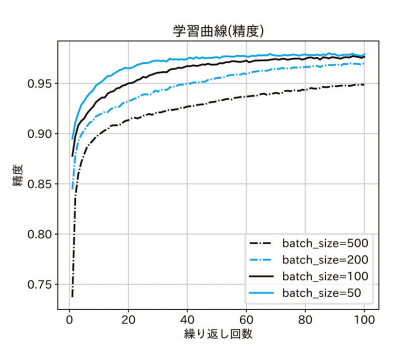




---

# CNNによる画像認識

前章で，MNISTを用いた画像の分類問題を説明しました．  
しかし，その際は「28×28の画像を1次元化したもの」を入力として扱っていました．  
直感的に考えると
- 1次元化するよりも，28×28の画像の状態でそのまま入力できた方が上手く学習できそう

な気がします．  

CNN(Convolutional Neural Netwotk)は，そのようなアイデアを形にしたものであり，画像をそのまま入力として扱うことができます．  

今回は，「CIFAR-10」と呼ばれる機械学習用のイメージ学習データを題材にして，CNNによるモデル構築を行います．  
「CIFAR-10データセット」は32×32のカラーイメージが，airplane, automobile, birdなどの10種類のカテゴリに分けられており，イメージカラカテゴリを予測する分類問題の学習データとして用いられており，訓練用に5万枚，検証用に1万枚のデータが公開されています．

MNISTと最大の違いはカラー画像であるという点であり，元データも下図のように
- 画像1枚あたり[3,32,32]という3階テンソル

で表現されます．

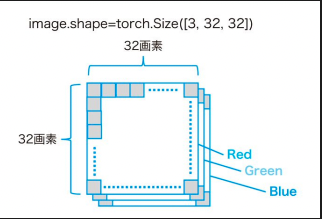

CNNでは「色，縦，横」の3階テンソルの構造を保ったままで画像を処理できます．  
ただし，2層目以降では「色」に該当するインデックスは色ではなくなってしまうため，奥行きにあたるインデックスは一般に「チャンネル」と呼ばれます．


---

## CNNの処理概要
下図に，CNNの元となったAlexNetと呼ばれるネットワーク図を示します．

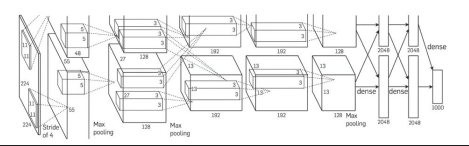

より，一般化した典型的なCNNは下図になります．

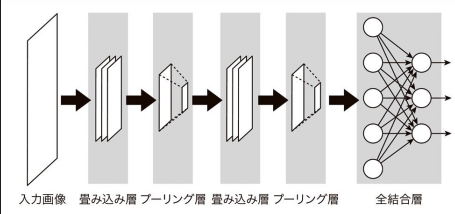

<br>

CNNを特徴づける処理としては「畳み込み処理（Convolution）」と「プーリング処理（Pooling）」があります．  

まず，畳み込み処理について説明します．イメージ図は以下のとおりです．

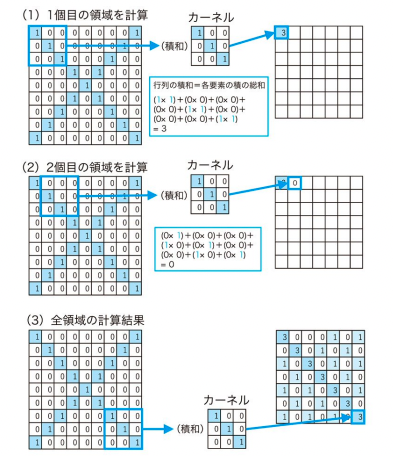

1. まず，3×3や5×5のような小さな正方形領域の配列を用意します．この配列のことを畳み込み処置では「カーネル」と呼びます
    - カーネルのサイズは一般的には奇数です．
2. 次に，元の画像をカーネルと同じ大きさの正方領域で切り取って，カーネルと対応する要素間で積を取り，その結果を加算した結果（積和）を出力領域の出力とします．
3. 切り取る領域を1つずつずらして，同じように積和を取り，隣の領域の出力とします
4. この処理を繰り返すことで，新しい正方形の出力パターンが出来上がります．

実際の畳み込みはもう少し複雑になります．  
入力チャンネルは複数あり，積和演算は全チャンネルにまたがって行われるため「カーネル」もそれに対応して入力チャンネル分あります．  
さらに出力チャンネルも複数あるため，カーネルは全体で4階のテンソルの構造を持つことになります．  

畳み込み処理は，カーネルの内容により，特定の傾きの直線が強調されるなど図形の特徴量の抽出に向いています．  
また，カーネルが移動しながら学習するため位置の移動に無関係な特徴量を検出可能になります．  

下図は，同じ畳み込み処理を何回かかけた結果です．処理を重ねるごとに左下から右上の向きの直線が強調されるようなカーネルが適用されていることが分かります．  

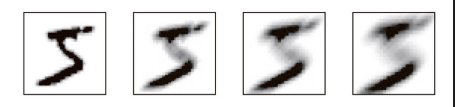


<br>

次に，プーリング処理について説明します．最もよく使用されるMaxPoolingのイメージ図を示します．

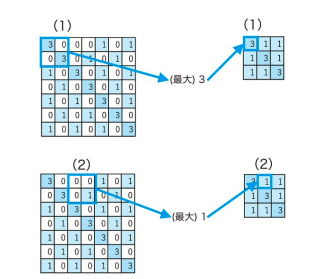

- 2×2などの小さな矩形画像を区切り，その範囲での最大値を出力します．
- 矩形領域をずらして再度最大値を取得し，隣の領域の値とします．

畳み込み処理は，1画素ずつずらして処理することが多いのに対して，プーリング処理は重なる領域を取らないようにずらすのが普通です．  

矩形領域のサイズは2×2が多いですが，これは，
- 縦横ともに元の画像の半分の画素数の新しい画像ができる

ためです．  

<br>

プーリング処理では，画像を縮小するのと同じような効果が期待できます．そのため，
- 物体の大きさによらない普遍的な特徴量を抽出するのに向いている

と言われています．


---

## PytorchでのCNNの実装
今回実装するCNNの全体構造を下図に示します．

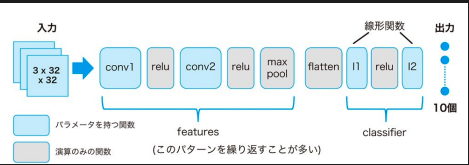

詳細を説明すると
- 畳み込み処理は，PyTorchでは`torch.nn.Conv2d`というレイヤー関数（畳み込み関数）が担っています
    - 上図のconv1, conv2にあたります．
- プーリング処理は`torch.nn.MaxPool2d`というレイヤー関数（プーリング関数）が担っています．
    - 上図のmaxpoolにあたります．
- 上図では，内部にパラメータを持つもの（＝学習対象）と，そうでないものを色分けしています．
    - 畳み込み関数，線形関数：関数の内部にパラメータを持ちます，
    - プーリング関数，ReLU関数：単なる演算なのでパラメータは持ちません．
- 「1階化関数（flatten）」では，チャンネル，縦，横と3階の広がりを持つ「畳み込み関数」「プーリング関数」の出力を横1列の1階テンソルに変換しています．
    - 分類モデルでは，最終的な出力が1階テンソル（今回の場合は，10個のクラス）なので，どこかのタイミングでこの処理が必要になります．
    - Pytrochではview関数を使うことも多いですが，ここでは`torch.nn.Flatten`というレイヤー関数を用いて実装します．

<br>

ここからは，それぞれのレイヤーについて詳しく説明します．  
まずは，`torch.nn.conv2d`と`torch.nn.MaxPool2d`について説明します．  

畳み込み関数`torch.nn.conv2d`は，引数に以下の3つを設定します．
- 第1引数：入力チャンネル数
- 第2引数：出力チャンネル数
- 第3引数：フィルターとなるカーネルの1辺の画素数を意味するカーネルサイズを指定

プーリング関数torch.nn.MaxPool2d`は，引数に以下を設定します．
- 第1引数：小さい矩形の縦と横の画素数

ReLUは単なる関数でパラメータを持たないため，利用時には同じ関数を使い回す前提なので1つしか定義していません．

In [ ]:
import torch
# CNN前半部分 レイヤー関数の定義

conv1 = torch.nn.Conv2d(3, 32, 3)
relu = torch.nn.ReLU(inplace=True)
conv2 = torch.nn.Conv2d(32, 32, 3)
maxpool = torch.nn.MaxPool2d((2,2))

<br>

ここで，conv1とconv2の内部パラメータを確認して見ましょう．  
conv1とconv2のweightは4つのインデックスを持つ4階のテンソルになっています．  
下図のように
- weightのshapeは最初の要素であり「32」は出力チャンネル数に対応しており
- 2つ目の要素の「3」は入力チャンネル数

を表しています．  

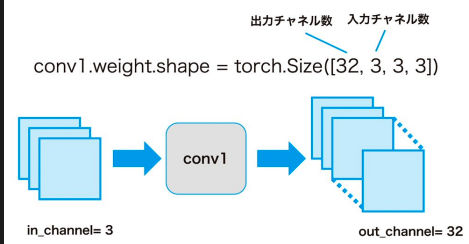

<br>

次に，conv1.weightの内部構造を下図に示します．  
下図では
- 出力チャンネル1用のカーネルは「入力チャンネル0用」から「入力チャンネル2用」まで3枚あります．
- また，実際の畳み込み処理では積和演算を全部で「入力チャンネル数」回（図の場合3回）行うことになります．
- そして，その結果を全て加算したものが最終的に「出力チャンネル1」のパターンとなります．
- 全体では，「出力チャンネル0」から「出力チャンネル31」までの全部で32セット，このようなパラメータが存在することになります．

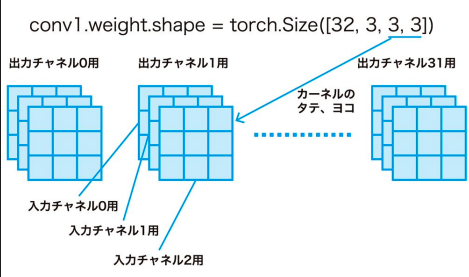

In [ ]:
print(conv1)

# conv1の内部変数のshapeを確認
print(conv1.weight.shape)
print(conv1.bias.shape)

# conv2の内部変数のshapeを確認
print(conv2.weight.shape)
print(conv2.bias.shape)

<br>

ここで，CNNの前半部分の処理をシミュレーションして見ましょう．

In [ ]:
# ダミーで入力と同じサイズのテンソルを生成
inputs = torch.randn(100, 3, 32, 32)
print(inputs.shape)

x1 = conv1(inputs)
x2 = relu(x1)
x3 = conv2(x2)
x4 = relu(x3)
x5 = maxpool(x4)

<br>

CNN途中段階でshapeを確認して見ます．  
この時，`torch.Size(データ件数，チャンネル数，画素数)`の順番になります．  

<br>

畳み込み処理の部分を確認してみると
- 畳み込み関数を1回通るたびに「32->30」「30->28」と2ずつ減っている

ことが分かります．これは，今回畳み込み処理で使用している重み行列（カーネル）のサイズが3×3であることと，畳み込み関数を通すと「畳み込み処理行列のサイズ-1」だけ出力データの画素数が減ることに対応しています．

<br>

次に，プーリング処理の部分を確認してみると
- 縦と横のサイズが半分の「14」になっている

ことが分かります．

<br>

最後に，ReLU関数では
- サイズに変化がない

ことが分かります．

In [ ]:
print(inputs.shape)
print(x1.shape)
print(x2.shape)
print(x3.shape)
print(x4.shape)
print(x5.shape)

<br>

ここで，先ほどシミュレーションした
```
x1 = conv1(inputs)
x2 = relu(x1)
x3 = conv2(x2)
x4 = relu(x3)
x5 = maxpool(x4)
```

の部分を確認すると，複数の関数の合成関数で構成されており，各関数が一直線に繋がる形になっていることが分かります．  

これと全く同じ処理を`torch.nn.Sequential`を使って実現できます．実際に，動作確認してみると先ほどと同じ動作をすることが確認できるはずです．

In [ ]:
# 関数定義
features = torch.nn.Sequential(
    conv1,
    relu,
    conv2,
    relu,
    maxpool
)

# 動作テスト
outputs = features(inputs)

print(outputs.shape)

<br>

`torch.nn.Flatten`は，1階のテンソルの形に変更する役割を持っており，実際に使用してみると，入力時に[100,32,32,14]だったshapeが[100,6272]の1階テンソル(32×14×14=6272)に変換されていることが分かります．

In [ ]:
# 関数定義
flatten = torch.nn.Flatten()

# 動作テスト
outputs2 = flatten(outputs)

print(outputs.shape)
print(outputs2.shape)


---

## 共通関数の利用

実効な医療が複雑になってくるとコードが長くなってきます．しかし，よく見てみると同じようなパターンの処理が何回も出てきていることが分かります．  

そこで，このようなパターンを5つ抽出して，それぞれを共通関数として定義することにします．  

共通関数にすることで実行結果が変わることはありませんが
- 人が見やすいコードを書く

ことができます．　

- eval_loss(損失関数)
  - 最初にデータローダーを使って，入力データと正解データを取得します
  - 入力データとモデルインスタンスから予測値を計算します
  - 予測値と正解データを使って損失を計算します

In [ ]:
# 損失計算用
def eval_loss(loader, device, net, criterion):

  # データローダーから最初の1セットを取得
  for images, labels in loader:
    break
  
  # デバイスの割り当て
  inputs = images.to(device)
  labels = labels.to(device)

  # 予測計算
  outputs = net(inputs)

  # 損失計算
  loss = criterion(outputs, labels)

  return loss

<br>

- fit(学習)
  - 今まで「繰り返し計算」と呼んでいた箇所を関数呼び出しで行います
  - 引数
    - net：学習対象のモデルインスタンス
    - optimizer：最適化関数のインスタンス
    - num_epochs：繰り返し数
    - train_loader：訓練用のデータローダー
    - test_loader：検証用のデータローダー
    - device：GPU or CPU
    - history：これまでのhistory
  - 戻り値
    - history：7章までのhistoryと同様に（繰り返し回数，訓練損失，訓練精度，検証損失，損失精度）の2次元配列をNumPy形式で返します  
  <br>  
  - 前章までと比較した追加部分
    - 引数もhistoryとして指定している
      - ディープラーニングではnum_epochsの設定が難しく，少ないと，学習不足になる可能性があり，多すぎると過学習が発生する可能性がある．
      - そこで，fit関数では引数historyに今までのhistoryを渡します．すると，「追加学習」の扱いで過去分も追加したhistoryを生成してくれます（以下，該当部分）  

      ```
      def fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history):

          base_epochs = len(history)
        
          for epoch in range(base_epochs, num_epochs+base_epochs):
              train_loss = 0
              train_acc = 0
      ```  

    - net.train(), net.eval()
      - それぞれ，訓練フェーズ，予測フェーズの先頭で呼び出します
      - この2つの関数はモデルクラスを定義する際に利用している親クラスnn.Moduleで定義されています


In [ ]:
import numpy as np
# 学習用関数
def fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history):

    # tqdmライブラリのインポート
    from tqdm.notebook import tqdm

    base_epochs = len(history)
  
    for epoch in range(base_epochs, num_epochs+base_epochs):
        train_loss = 0
        train_acc = 0
        val_loss = 0
        val_acc = 0

        #訓練フェーズ-----------------------------------------------------
        net.train()
        count = 0

        for inputs, labels in tqdm(train_loader):
            count += len(labels)
            inputs = inputs.to(device)
            labels = labels.to(device)

            # 勾配の初期化
            optimizer.zero_grad()

            # 予測計算
            outputs = net(inputs)

            # 損失計算
            loss = criterion(outputs, labels)
            train_loss += loss.item()

            # 勾配計算
            loss.backward()

            # パラメータ修正
            optimizer.step()

            # 予測値算出
            predicted = torch.max(outputs, 1)[1]

            # 正解件数算出
            train_acc += (predicted == labels).sum()

            # 損失と精度の計算
            avg_train_loss = train_loss / count
            avg_train_acc = train_acc / count

        #予測フェーズ ----------------------------------------------------
        net.eval()
        count = 0

        for inputs, labels in test_loader:
            count += len(labels)
            inputs = inputs.to(device)
            labels = labels.to(device)

            # 予測計算
            outputs = net(inputs)

            # 損失計算
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # 予測値算出
            predicted = torch.max(outputs, 1)[1]

            # 正解件数算出
            val_acc += (predicted == labels).sum()

            # 損失と精度の計算
            avg_val_loss = val_loss / count
            avg_val_acc = val_acc / count
    
        print (f'Epoch [{(epoch+1)}/{num_epochs+base_epochs}], loss: {avg_train_loss:.5f} acc: {avg_train_acc:.5f} val_loss: {avg_val_loss:.5f}, val_acc: {avg_val_acc:.5f}')
        item = np.array([epoch+1, avg_train_loss, avg_train_acc, avg_val_loss, avg_val_acc])
        history = np.vstack((history, item))
    return history

<br>

- evaluate_history(学習ログ)
  - 学習結果の評価に関して
    - historyの先頭と最後をprint関数で表示して学習結果の概要を表示
    - 学習曲線を損失，精度の2つで表示  

    というパターンを一つの関数にまとめました．

In [ ]:
!pip install japanize_matplotlib | tail -n 1

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import japanize_matplotlib
# 学習ログ解析

def evaluate_history(history):
    #損失と精度の確認
    print(f'初期状態: 損失: {history[0,3]:.5f} 精度: {history[0,4]:.5f}') 
    print(f'最終状態: 損失: {history[-1,3]:.5f} 精度: {history[-1,4]:.5f}' )

    num_epochs = len(history)
    unit = num_epochs / 10

    # 学習曲線の表示 (損失)
    plt.figure(figsize=(9,8))
    plt.plot(history[:,0], history[:,1], 'b', label='訓練')
    plt.plot(history[:,0], history[:,3], 'k', label='検証')
    plt.xticks(np.arange(0,num_epochs+1, unit))
    plt.xlabel('繰り返し回数')
    plt.ylabel('損失')
    plt.title('学習曲線(損失)')
    plt.legend()
    plt.show()

    # 学習曲線の表示 (精度)
    plt.figure(figsize=(9,8))
    plt.plot(history[:,0], history[:,2], 'b', label='訓練')
    plt.plot(history[:,0], history[:,4], 'k', label='検証')
    plt.xticks(np.arange(0,num_epochs+1,unit))
    plt.xlabel('繰り返し回数')
    plt.ylabel('精度')
    plt.title('学習曲線(精度)')
    plt.legend()
    plt.show()

<br>  

- show_images_labels(予測結果表示)
  - 事前学習済みモデルで正しい予測ができているかを，元データのイメージ表示とともに行います
  - また，モデルを作る前に，イメージと正解データ（ラベル）だけを表示することも可能です
  - 対象は，データローダーで取得される先頭50件（ローダーで定義される件数が50件以下の場合はその件数）になります
  - 引数
    - loader：検証用データローダー
    - classes：正解データに対応するラベル値のリスト．本章の場合，正解データに対応するラベル値である「plane」「car」「bird」などを含んだリストです
    - net：予測対象の事前学習済みモデルインスタンス． Noneを渡すと正解データのみを表示でき，学習前にデータの様子を確認したい時に使用します
    - device：予測計算に利用するデバイス．予測結果も表示するときにのみ利用します
  - 以下が，条件によりタイトル表示を可変にする本質的な部分になります  
  ```
  if net is not None:
    predicted_name = classes[predicted[i]]
    # 正解かどうかで色分けをする
    if label_name == predicted_name:
      c = 'k'
    else:
      c = 'b'
    ax.set_title(label_name + ':' + predicted_name, c=c, fontsize=20)
  else: # netがNoneの場合は、正解ラベルのみ表示
    ax.set_title(label_name, fontsize=20)
  ```  
  - 「正解値：予測値」の形式でテキストを表示しますが，予測値が正解値と異なっている場合だけ，タイトルの色が青になるようにしてあります．  
  - netがNoneの場合は，正解値のみをタイトルに表示します  
  - また，前章と異なりイメージの画像データが「3,32,32]の3階テンソル形式になっている．このため，実際にイメージを表示するための手順がやや煩雑となります

In [ ]:
# イメージとラベル表示
def show_images_labels(loader, classes, net, device):

    # データローダーから最初の1セットを取得する
    for images, labels in loader:
        break
    # 表示数は50個とバッチサイズのうち小さい方
    n_size = min(len(images), 50)

    if net is not None:
      # デバイスの割り当て
      inputs = images.to(device)
      labels = labels.to(device)

      # 予測計算
      outputs = net(inputs)
      predicted = torch.max(outputs,1)[1]
      #images = images.to('cpu')

    # 最初のn_size個の表示
    plt.figure(figsize=(20, 15))
    for i in range(n_size):
        ax = plt.subplot(5, 10, i + 1)
        label_name = classes[labels[i]]
        # netがNoneでない場合は、予測結果もタイトルに表示する
        if net is not None:
          predicted_name = classes[predicted[i]]
          # 正解かどうかで色分けをする
          if label_name == predicted_name:
            c = 'k'
          else:
            c = 'b'
          ax.set_title(label_name + ':' + predicted_name, c=c, fontsize=20)
        # netがNoneの場合は、正解ラベルのみ表示
        else:
          ax.set_title(label_name, fontsize=20)
        # TensorをNumPyに変換
        image_np = images[i].numpy().copy()
        # 軸の順番変更 (channel, row, column) -> (row, column, channel)
        img = np.transpose(image_np, (1, 2, 0))
        # 値の範囲を[-1, 1] -> [0, 1]に戻す
        img = (img + 1)/2
        # 結果表示
        plt.imshow(img)
        ax.set_axis_off()
    plt.show()

<br>  

- torch_seed(乱数初期化)
  - 乱数を初期化して，いつも同じ結果になるための処理です
  - GPUを使って計算した場合，乱数の種を固定しただけでは結果が同一にならないことがあるので，その現象が起きないように2行追加しています

In [ ]:
# PyTorch乱数固定用

def torch_seed(seed=123):
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.backends.cudnn.deterministic = True
  torch.use_deterministic_algorithms = True


---

## データ準備

最初にTransformsを定義します．  
今回は，比較ように前章の「全結合型ニューラルネットワーク」の学習も行うため，1階テンソル版と3階テンソル版の2種類を用意します．

In [ ]:
import torchvision.transforms as transforms

# Transformsの定義

# transform1 1階テンソル
transform1  = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize(0.5, 0.5),
  transforms.Lambda(lambda x: x.view(-1)),                                
])

# transform2 正規化のみ実施

# 検証用データ：正規化のみ実施
transform2 = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize(0.5, 0.5),
])

<br>
データセットに関しても，同様に2種類用意します．

In [ ]:
import torchvision.datasets as datasets

# データ取得用関数　データセット

data_root = "./data"

# 訓練用データセット　1階テンソル版
train_set1 = datasets.CIFAR10(
    root = data_root, train = True,
    download = True, transform = transform1
)

# 検証データセット 1階テンソル版
test_set1 = datasets.CIFAR10(
    root = data_root, train = False, 
    download = True, transform = transform1)

# 訓練データセット 3階テンソル版
train_set2 = datasets.CIFAR10(
    root =  data_root, train = True, 
    download = True, transform = transform2)

# 検証データセット 3階テンソル版
test_set2 = datasets.CIFAR10(
    root = data_root, train = False, 
    download = True, transform = transform2)


# データセットの確認 ----------------
image1, label1 = train_set1[0]
image2, label2 = train_set2[0]

print(image1.shape)
print(image2.shape)

<br>

データローダーも同様に2種類用意します．

In [ ]:
from torch.utils.data import DataLoader
# データローダーの定義

# ミニバッチサイズ指定
batch_size = 100

# 訓練用データローダー
# 訓練用なので，シャッフルをかける
train_loader1 =  DataLoader(train_set1, batch_size=batch_size, shuffle=True)

# 検証用データローダー
# 検証時にはシャッフル不要
test_loader1 = DataLoader(test_set1, batch_size=batch_size, shuffle=False)

# 訓練用データローダー
# 訓練用なので，シャッフルをかける
train_loader2 = DataLoader(train_set2, batch_size=batch_size, shuffle=True)

# 検証用データローダー
# 検証時にはシャッフル不要
test_loader2 = DataLoader(test_set2, batch_size, shuffle=False)

# 検証データのイメージ表示 ----------------
# 正解ラベル定義
classes = ("plane", "car", "bird", "cat",
           "deer", "dog", "frog", "horse", "ship", "truck")

# 検証データ最初の50個の表示
show_images_labels(test_loader2, classes, None, None)

## モデル定義（全結合版）
最初に比較用の「全結合版」のモデルを定義します．

In [ ]:
# 入力次元数 今回は3*32*32=3072
n_input = image1.view(-1).shape[0]

# 出力次元数
# 分類先クラス数　今回は10になる
n_output = len(set(list(labels1.data.numpy())))

# 隠れ層のノード数
n_hidden = 128

# 結果確認
print(f'n_input: {n_input}  n_hidden: {n_hidden} n_output: {n_output}')


# モデルの定義 ----------------------
# モデルの定義
# 3072入力10出力1隠れ層のニューラルネットワークモデル

class Net(torch.nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()

        # 隠れ層の定義 (隠れ層のノード数: n_hidden)
        self.l1 = torch.nn.Linear(n_input, n_hidden)

        # 出力層の定義
        self.l2 = torch.nn.Linear(n_hidden, n_output)

        # ReLU関数の定義
        self.relu = torch.nn.ReLU(inplace=True)
   
    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        return x3


---

## 結果（全結合版）
結果を確認してみます．なお，共通関数fitを定義しているため，学習の実装コードが1行で済むようになっています．

In [ ]:
import torch.optim as optim

# デバイスの割り当て
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# 乱数初期化
torch_seed()

# モデルインスタンス生成
net = Net(n_input, n_output, n_hidden).to(device)

# 損失関数：交差エントロピー関数
criterion = torch.nn.CrossEntropyLoss()

# 学習率
lr = 0.01

# 最適化関数：勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 繰り返し回数
num_epochs = 50

# 評価結果記録用
history = np.zeros((0, 5))

# 学習
history = fit(net, optimizer, criterion, num_epochs, train_loader1, test_loader1, device, history)

<br>  

evaluate_history関数で評価を行います．  
結果を見ると，検証データに対するグラフから繰り返し回数30回程度で上限で，精度は53%程度になっていることが分かります．

In [ ]:
# 評価
evaluate_history(history)


---

## モデル定義（CNN版）
今回のforward関数は，`features`,`flatten`,`classifier`の3つの呼び出しを組み合わせた形になっています．  
`features`と`classifier`は`torch.nn.Sequential`で作成されており，それぞれ
- `features`：畳み込み関数とプーリング関数から構成
- `classifier`：線形関数から構成されている分類器

といった構成になっています．  
そして，`flatten`は上記の2つをつなげる橋渡し役を担っています．


In [ ]:
class CNN(torch.nn.Module):
  def __init__(self, n_output, n_hidden):
    super().__init__()
    self.conv1 = torch.nn.Conv2d(3, 32, 3)
    self.conv2 = torch.nn.Conv2d(32, 32, 3)
    self.relu = torch.nn.ReLU(inplace=True)
    self.maxpool = torch.nn.MaxPool2d((2,2))
    self.flatten = torch.nn.Flatten()
    self.l1 = torch.nn.Linear(6272, n_hidden)
    self.l2 = torch.nn.Linear(n_hidden, n_output)

    self.features = torch.nn.Sequential(
        self.conv1,
        self.relu,
        self.conv2,
        self.relu,
        self.maxpool)
    
    self.classifier = torch.nn.Sequential(
       self.l1,
       self.relu,
       self.l2)

  def forward(self, x):
    x1 = self.features(x)
    x2 = self.flatten(x1)
    x3 = self.classifier(x2)
    return x3 

# モデルインスタンス生成 -------------------
net = CNN(n_output, n_hidden).to(device)


# 損失関数，最適化関数の定義 --------------------
# 損失関数： 交差エントロピー関数
criterion = torch.nn.CrossEntropyLoss()

# 学習率
lr = 0.01

# 最適化関数: 勾配降下法
optimizer = torch.optim.SGD(net.parameters(), lr=lr)    


---

## 結果（CNN版）
CNNで学習を行います．

In [ ]:
# 乱数初期化
torch_seed()

# モデルインスタンス生成
net = CNN(n_output, n_hidden).to(device)

# 損失関数： 交差エントロピー関数
criterion = nn.CrossEntropyLoss()

# 学習率
lr = 0.01

# 最適化関数: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 繰り返し回数
num_epochs = 50

# 評価結果記録用
history2 = np.zeros((0,5))

# 学習
history2 = fit(net, optimizer, criterion, num_epochs, train_loader2, test_loader2, device, history2)

<br>

結果を確認すると，精度が66%程度でていることが分かります．全結合の時は53%だったので精度が向上していることが確認できました．


In [ ]:
evaluate_history(history2)

# show_images_labelsで予測結果付きで表示
show_images_labels(test_loader2, classes, net, device)